In [1]:

import sys
import os
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from time import time

sys.path.append("/home/natacha/Documents/Work/python")  # to import galib
sys.path.insert(1, os.path.join(sys.path[0], '..'))  #to use PersistentGraph submodules
sys.path.insert(1, os.path.join(sys.path[0], '../../'))  #to use PersistentGraph submodules

from persistentgraph import PersistentGraph
from plots import plot_as_graph, plot_barcodes, plot_bottleneck_distances
from analysis import basic_stats, compute_barcodes, compute_bottleneck_distances
from DataAnalysis.statistics import extract_variables


In [2]:
nc = Dataset("/home/natacha/Documents/Work/Data/Bergen/ec.ens.2020012900.sfc.meteogram.nc","r")
(list_var, var_names) = extract_variables(nc, var_names=["t2m"], ind_lat=np.array([0]), ind_long=np.array([0]))
members = np.transpose(list_var[0].squeeze())
nc02 = Dataset("/home/natacha/Documents/Work/Data/Bergen/ec.ens.2020011400.sfc.meteogram.nc","r")
(list_var, var_names) = extract_variables(nc02, var_names=["t2m"], ind_lat=np.array([0]), ind_long=np.array([0]))
members02 = np.transpose(list_var[0].squeeze())
dist_weights = np.loadtxt("/home/natacha/Documents/tmp/figs/global_variation_t2m/weights_max_distance.txt")

In [3]:
#g = PersistentGraph(members,dist_weights)
g = PersistentGraph(members)
start = time()
g.construct_graph(verbose=False)
end = time()
print("Graph constructed in %.2f" %(end-start))

Graph constructed in 2.25


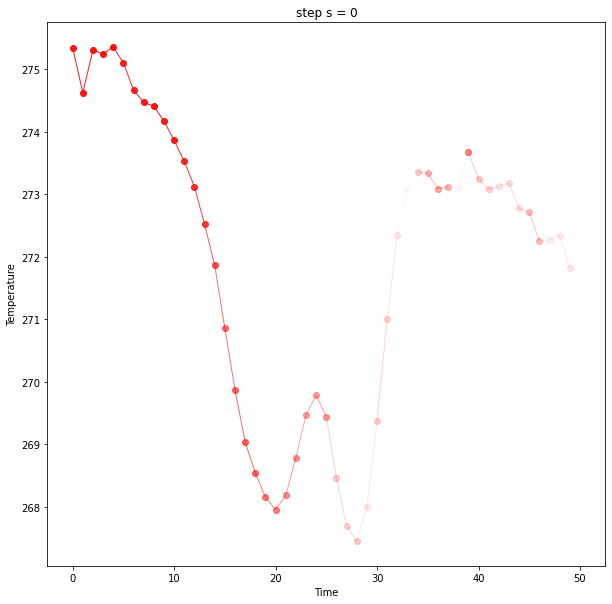

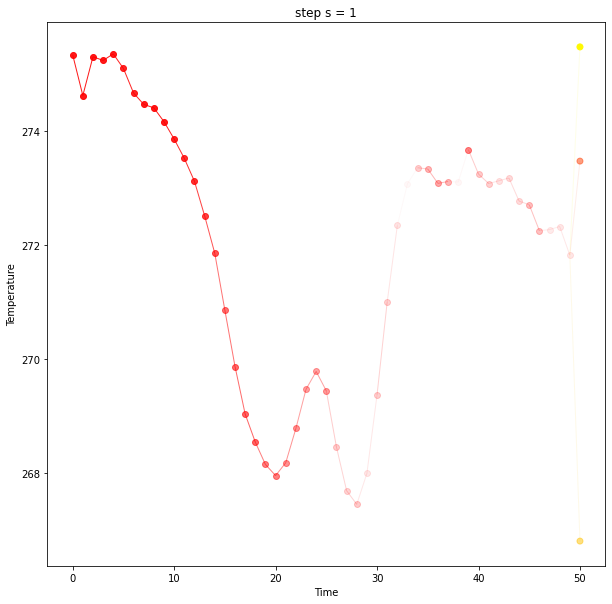

In [4]:
for s in range(2):
    plot_as_graph(g, s, show_edges=True)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc83dbcf250>)

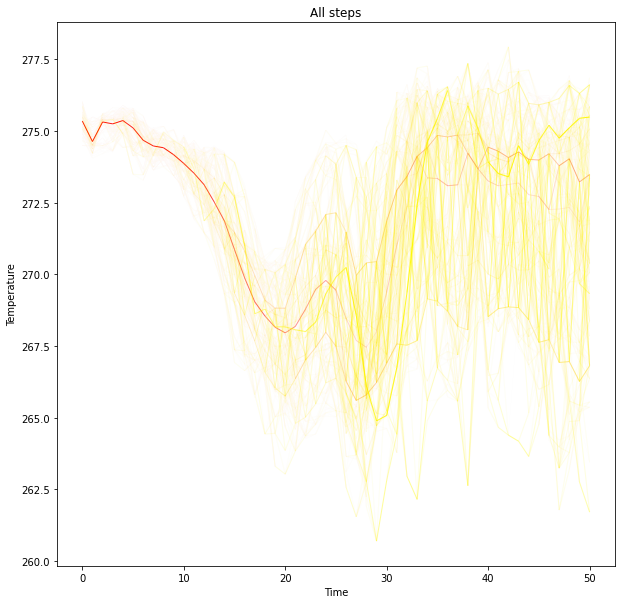

In [5]:
plot_as_graph(g, show_edges=True, show_vertices=False)

In [6]:
stats01 = basic_stats(g.edges)
print(g.nb_vertices/g.nb_vertices_max)
print(g.nb_vertices)

[0.10509804 0.11137255 0.08862745 0.11921569 0.09019608 0.09803922
 0.09803922 0.09254902 0.09176471 0.0972549  0.08941176 0.09647059
 0.09333333 0.09960784 0.10039216 0.09647059 0.09568627 0.09411765
 0.09568627 0.09568627 0.09882353 0.09490196 0.09411765 0.08705882
 0.09411765 0.09019608 0.08941176 0.09960784 0.09568627 0.09098039
 0.09490196 0.09254902 0.09098039 0.10196078 0.09882353 0.09803922
 0.09960784 0.10431373 0.09333333 0.09647059 0.09568627 0.09176471
 0.10196078 0.09098039 0.09803922 0.09176471 0.09490196 0.09333333
 0.10352941 0.09333333 0.09568627]
[134 142 113 152 115 125 125 118 117 124 114 123 119 127 128 123 122 120
 122 122 126 121 120 111 120 115 114 127 122 116 121 118 116 130 126 125
 127 133 119 123 122 117 130 116 125 117 121 119 132 119 122]


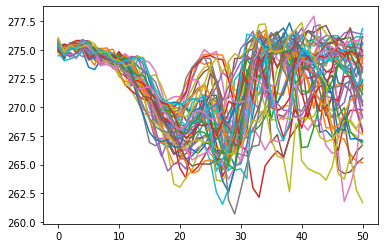

In [7]:
plt.plot(np.transpose(g.members))
plt.show()

In [8]:
#g02 = PersistentGraph(members02, dist_weights)
g02 = PersistentGraph(members02)
start = time()
g02.construct_graph(verbose=False)
end = time()
print("Graph constructed in %.2f" %(end-start))

Graph constructed in 2.26


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc833c74490>)

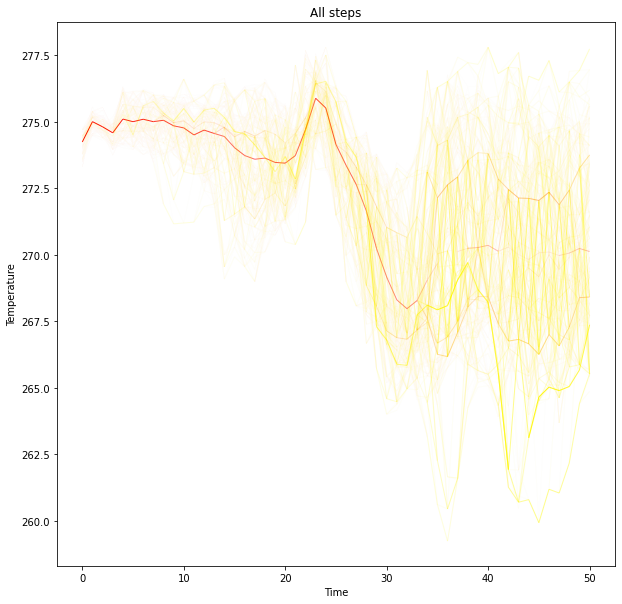

In [9]:
plot_as_graph(g02, show_edges=True, show_vertices=False)


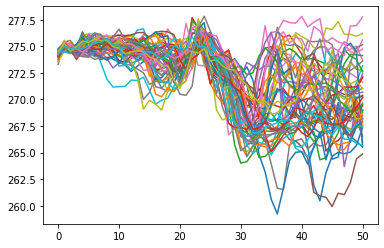

In [10]:
plt.plot(np.transpose(g02.members))
plt.show()
stats02 = basic_stats(g02.edges)

====== Graph 01 ======
0.018098294800525057
0.0507395146909053
0.9046005473739241
0.0
0.0404304381245196
0.07749173587637526
1.0
0.02
====== Graph 02 ======
0.015606999295570287
0.045951822479124736
0.9298607329023818
0.0
0.039645377400625285
0.07546455331710214
1.0
0.02
[0.11921569 0.09647059 0.11137255 0.09882353 0.08862745 0.0972549
 0.09960784 0.09019608 0.09333333 0.09333333 0.09333333 0.09647059
 0.09490196 0.08862745 0.09411765 0.0972549  0.09019608 0.09254902
 0.09176471 0.09803922 0.09960784 0.08941176 0.09333333 0.09333333
 0.09882353 0.09803922 0.08862745 0.09803922 0.10196078 0.10431373
 0.09254902 0.10117647 0.09333333 0.10431373 0.09882353 0.09882353
 0.09333333 0.09176471 0.09960784 0.09647059 0.09568627 0.09411765
 0.10196078 0.09098039 0.09490196 0.09568627 0.09411765 0.09333333
 0.09882353 0.09647059 0.10039216]
[152 123 142 126 113 124 127 115 119 119 119 123 121 113 120 124 115 118
 117 125 127 114 119 119 126 125 113 125 130 133 118 129 119 133 126 126
 119 117 127

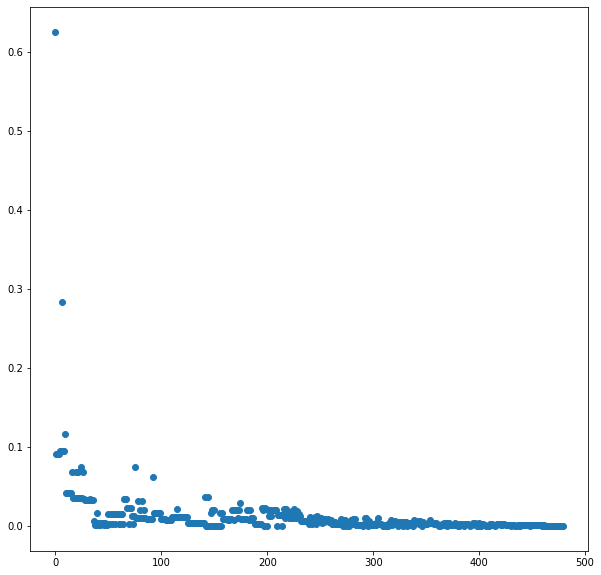

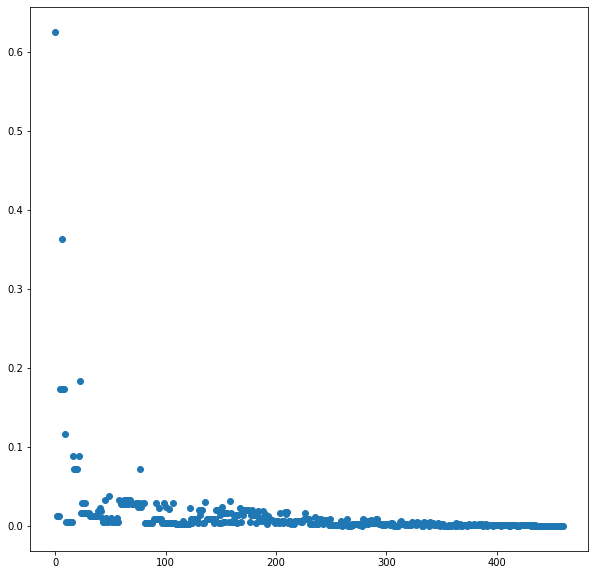

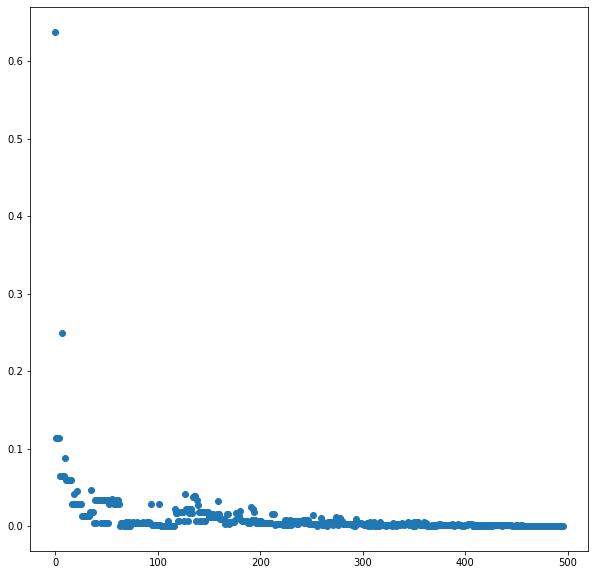

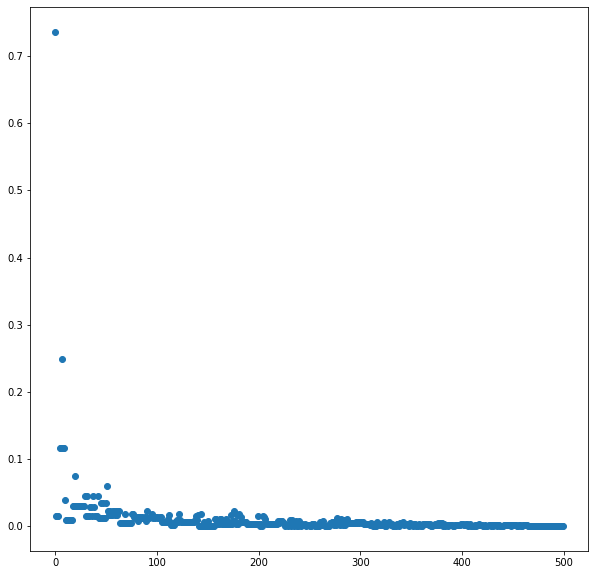

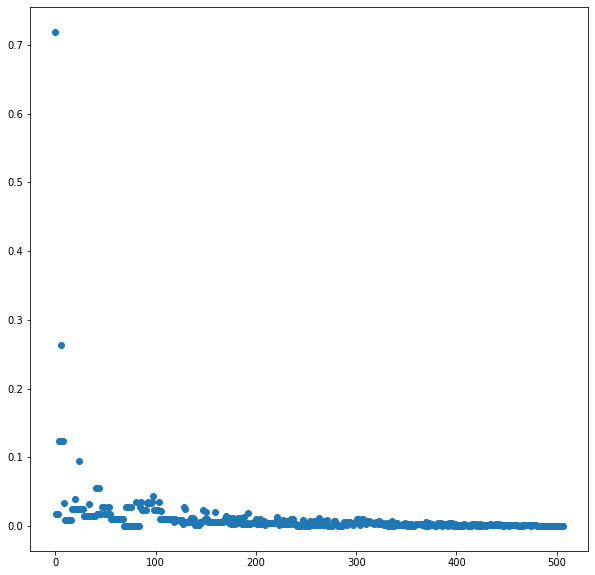

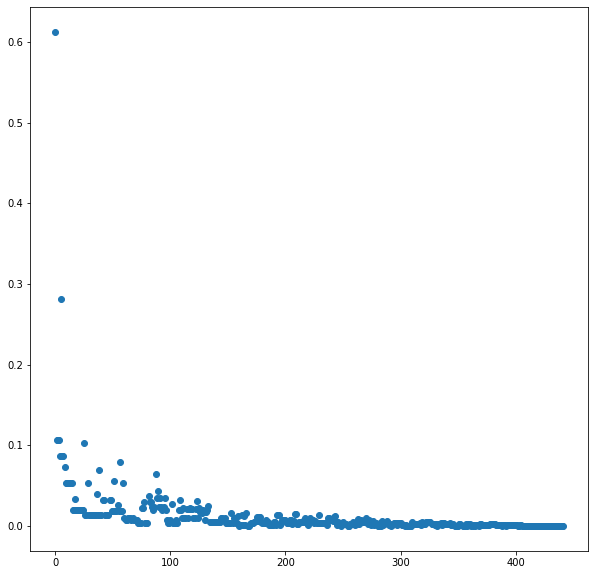

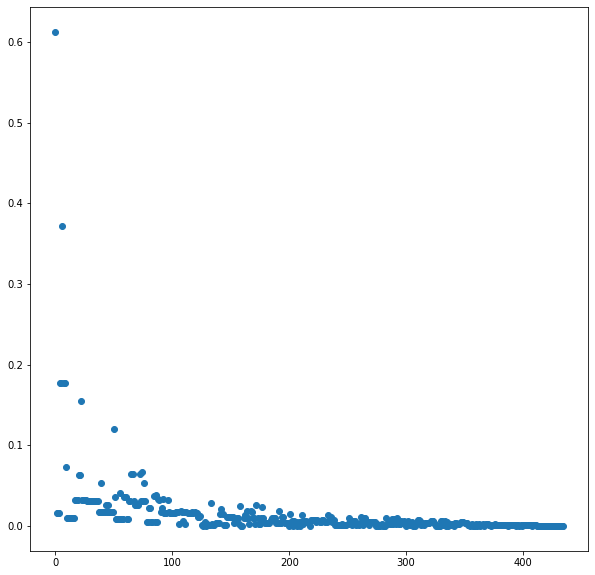

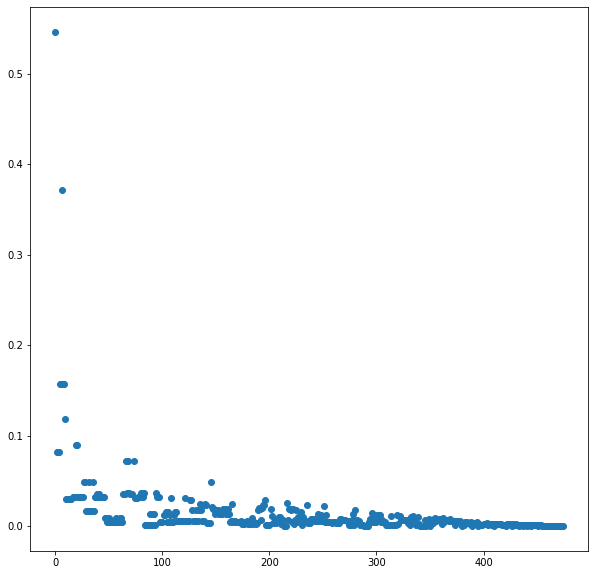

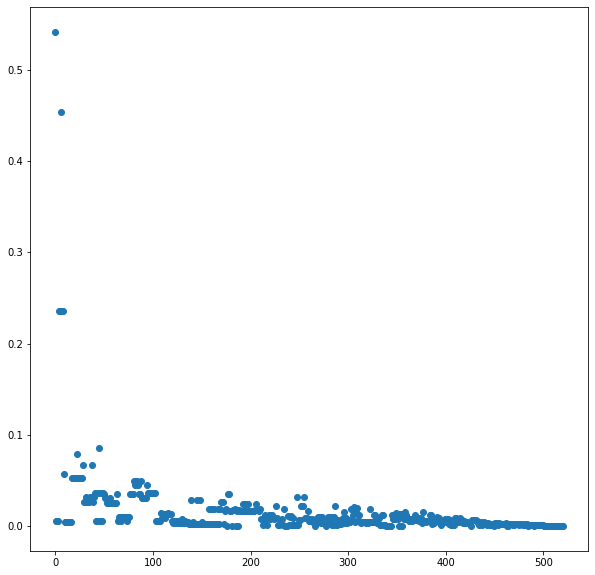

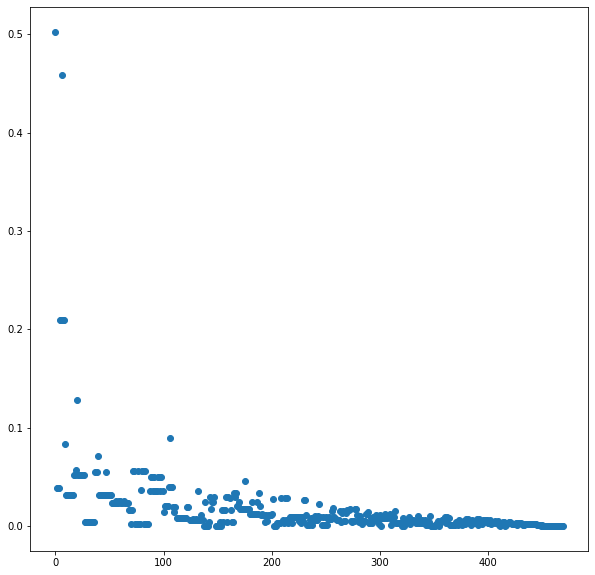

In [11]:

print("====== Graph 01 ======")
print(stats01["mean_ratio_life"])
print(stats01["std_ratio_life"])
print(stats01["max_ratio_life"])
print(stats01["min_ratio_life"])
print(stats01["mean_ratio_members"])
print(stats01["std_ratio_members"])
print(stats01["max_ratio_members"])
print(stats01["min_ratio_members"])

print("====== Graph 02 ======")
print(stats02["mean_ratio_life"])
print(stats02["std_ratio_life"])
print(stats02["max_ratio_life"])
print(stats02["min_ratio_life"])
print(stats02["mean_ratio_members"])
print(stats02["std_ratio_members"])
print(stats02["max_ratio_members"])
print(stats02["min_ratio_members"])

print(g02.nb_vertices/g02.nb_vertices_max)
print(g02.nb_vertices)
print(g02.nb_edges)
for t in range(20,30):  
    e_lives = [e.ratio_life for e in g02.edges[t]]
    plt.figure(figsize=(10,10))
    plt.scatter(range(len(e_lives)), e_lives)

Graph constructed in 0.08


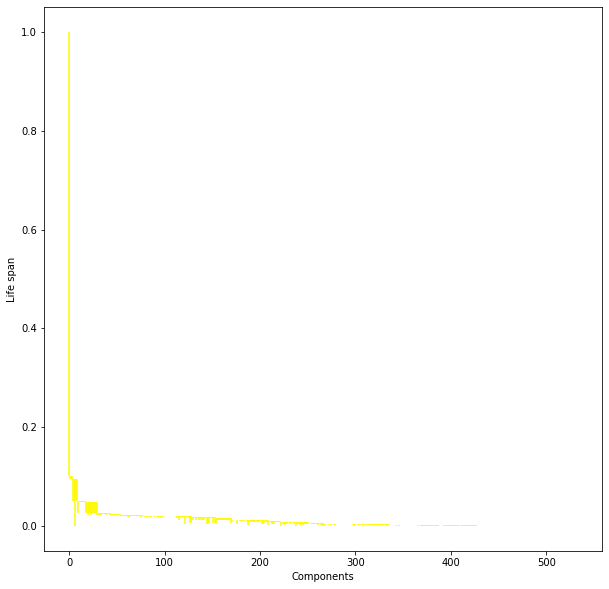

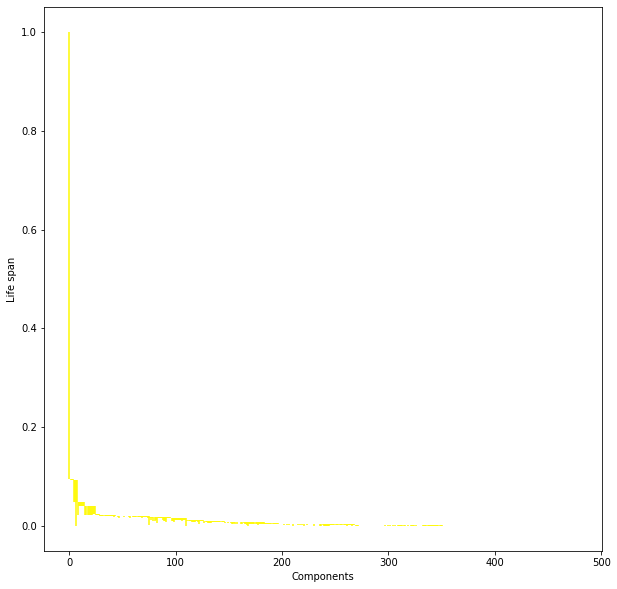

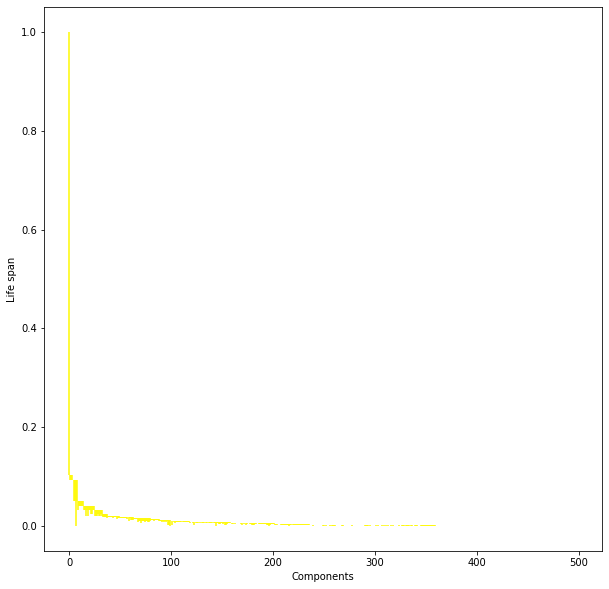

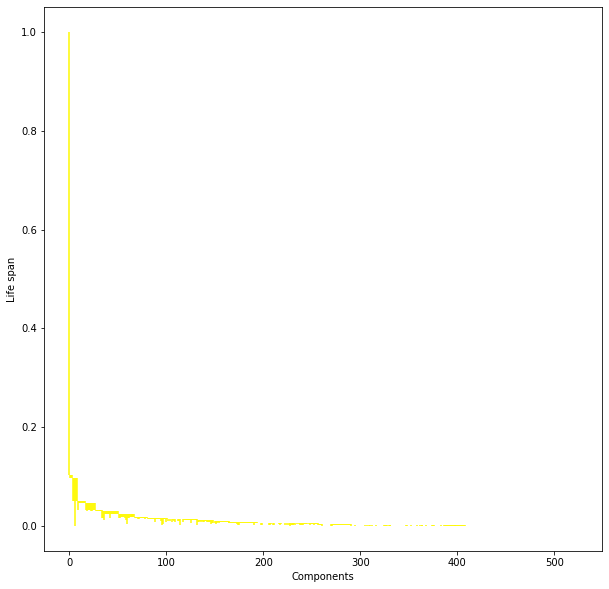

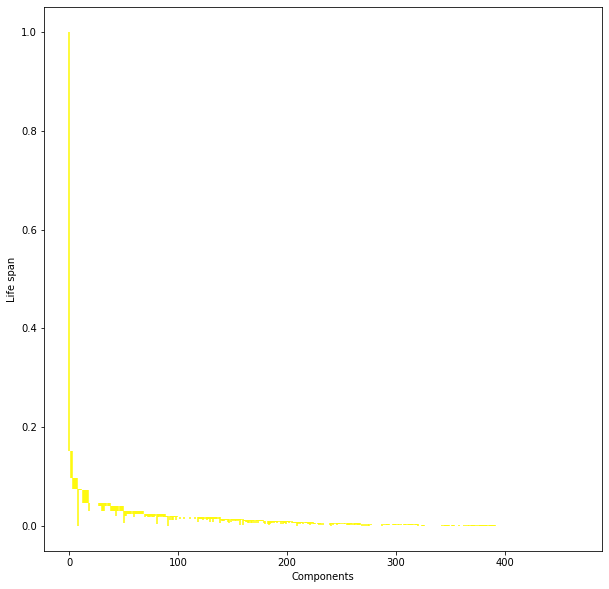

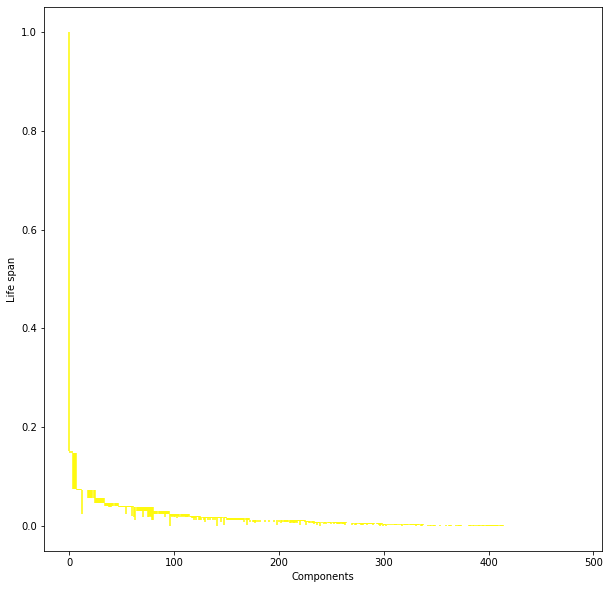

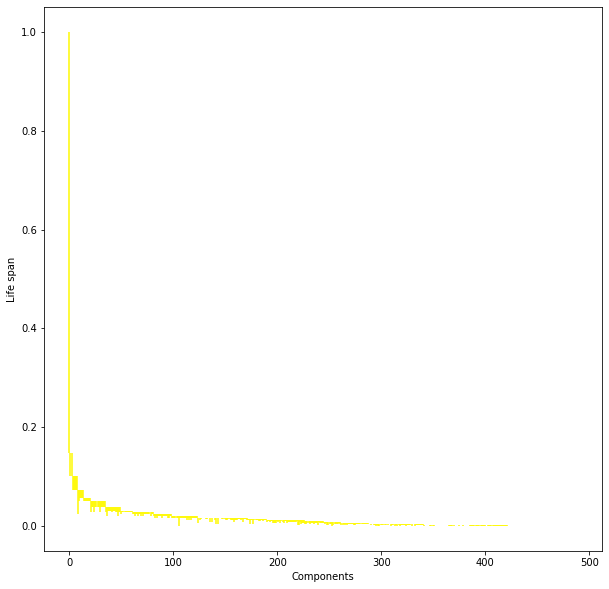

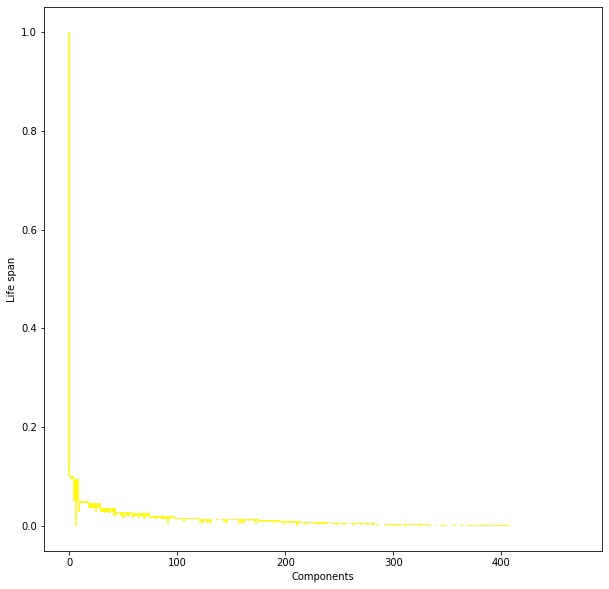

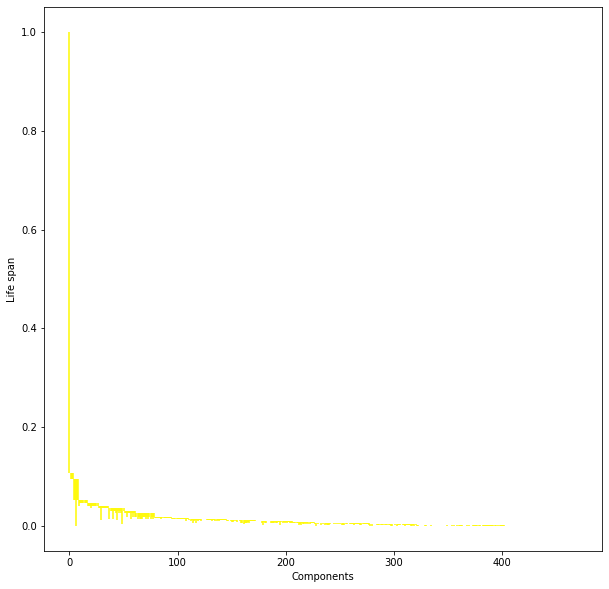

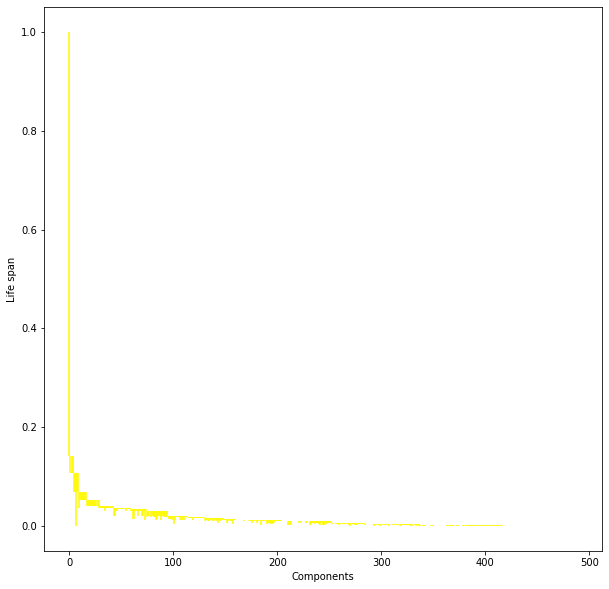

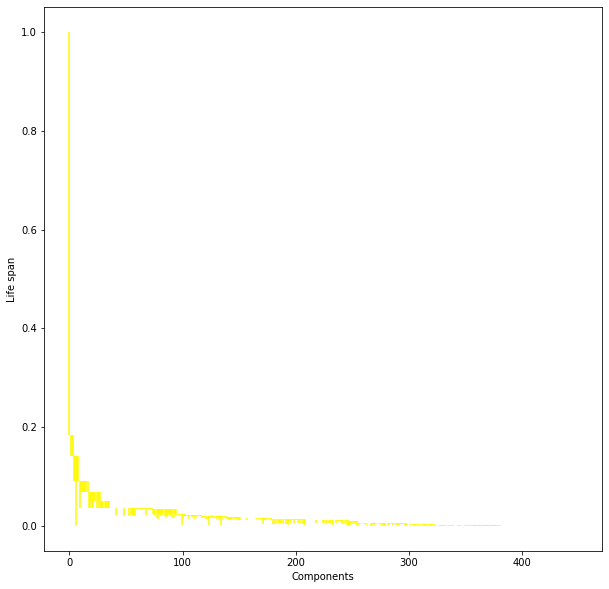

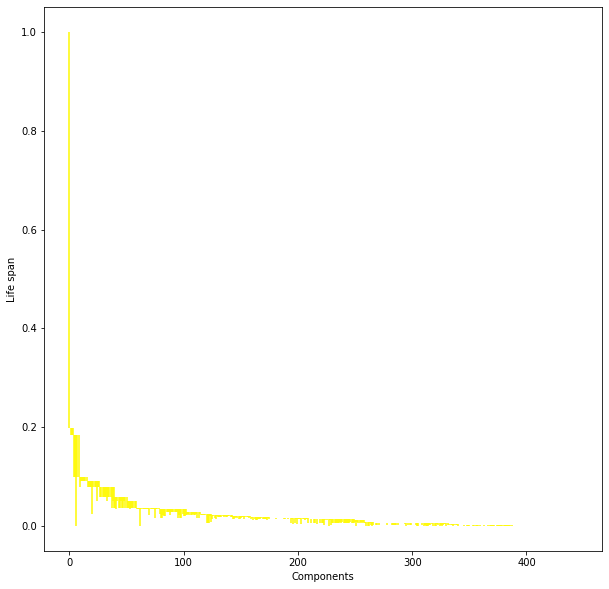

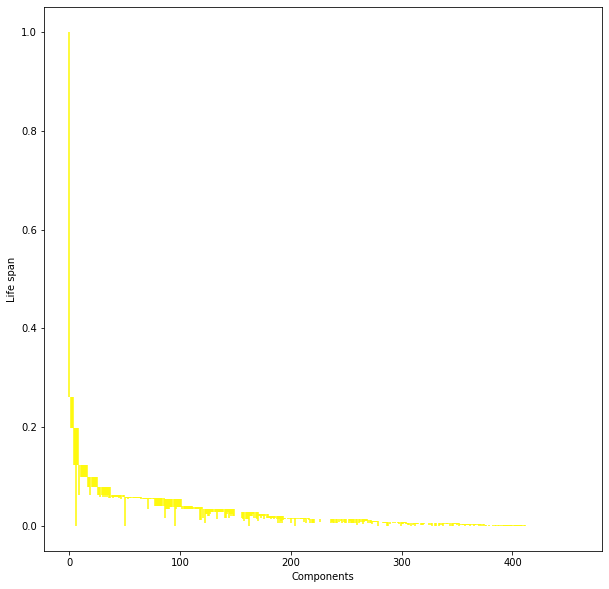

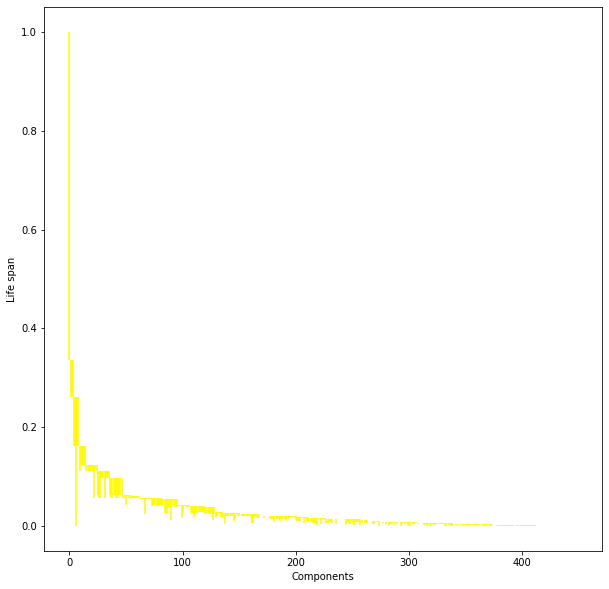

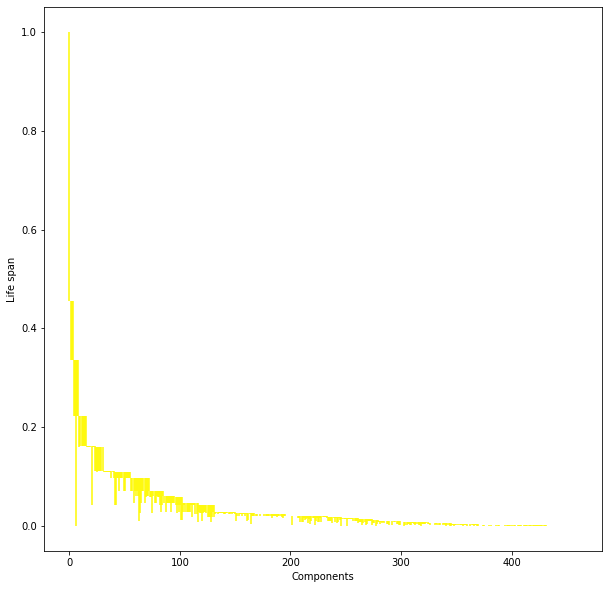

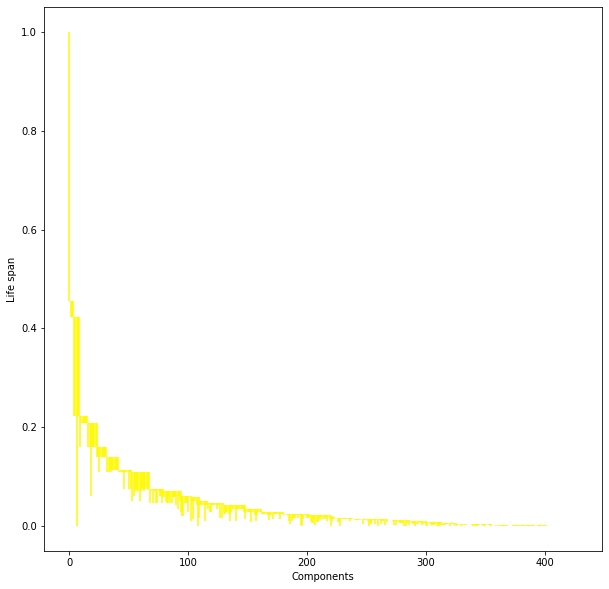

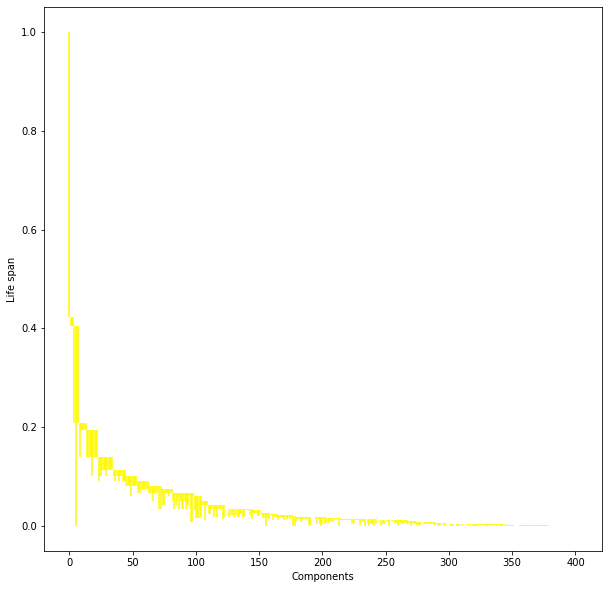

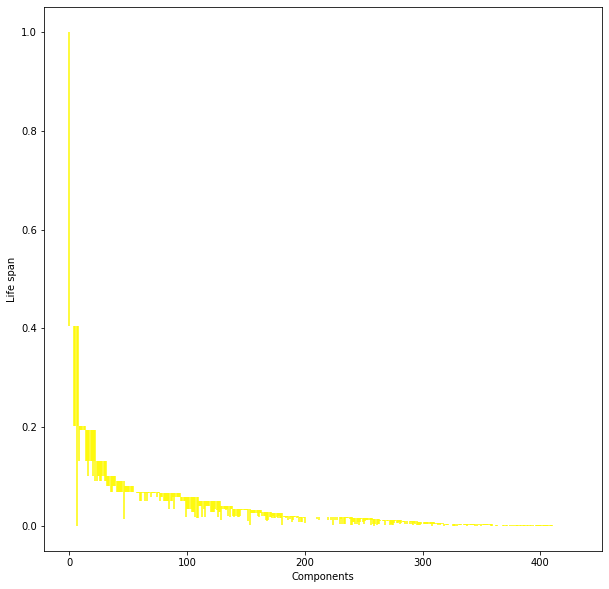

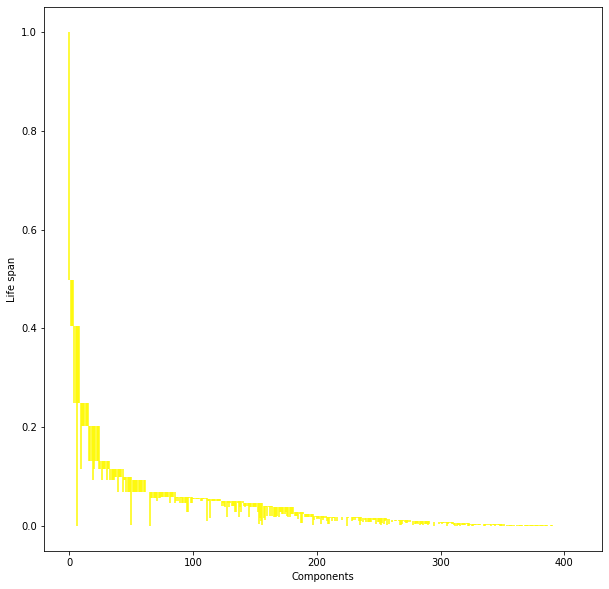

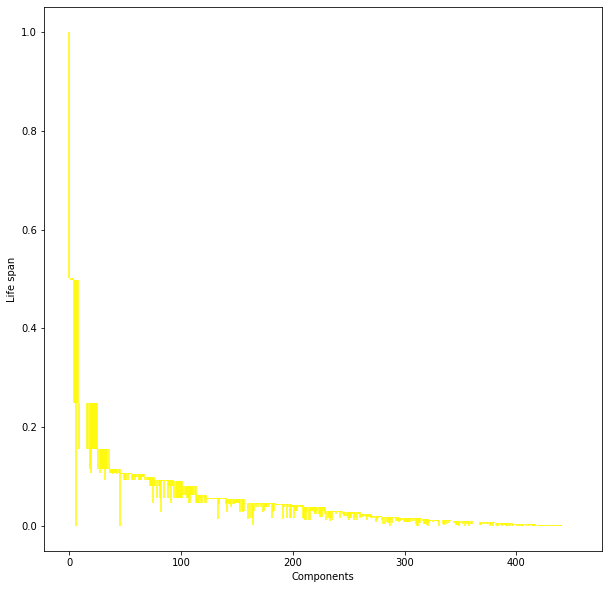

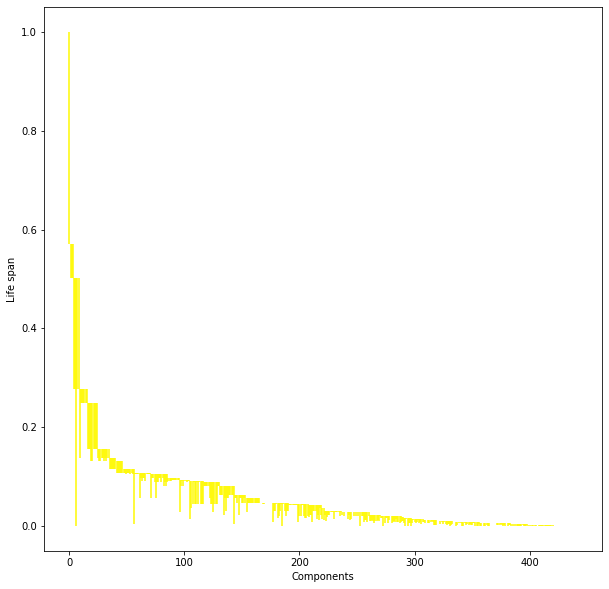

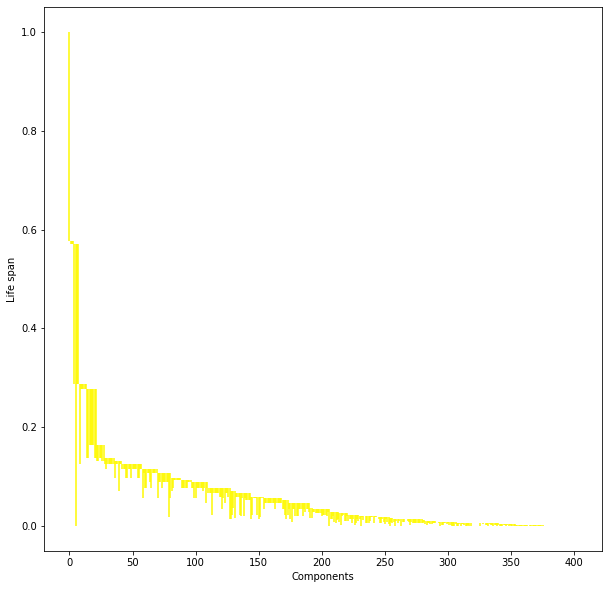

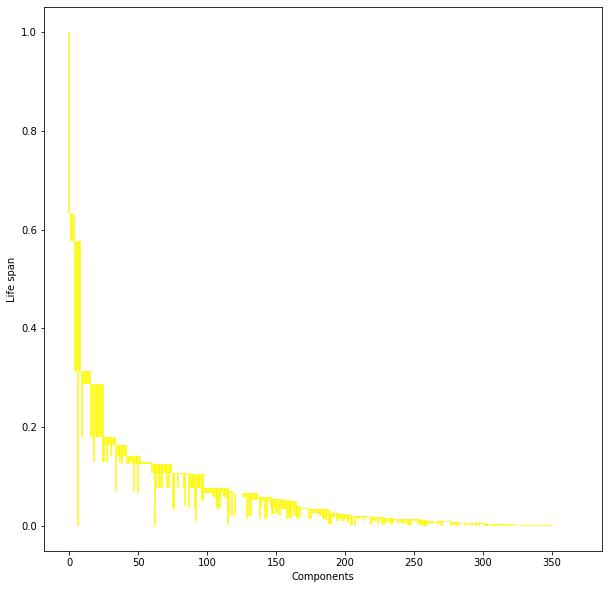

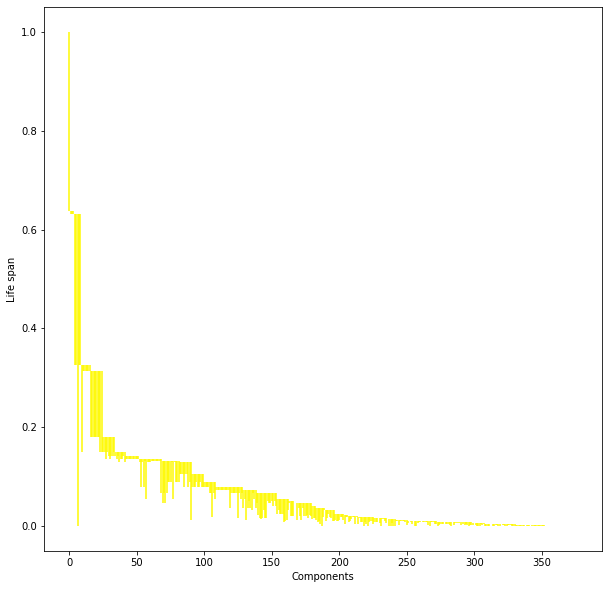

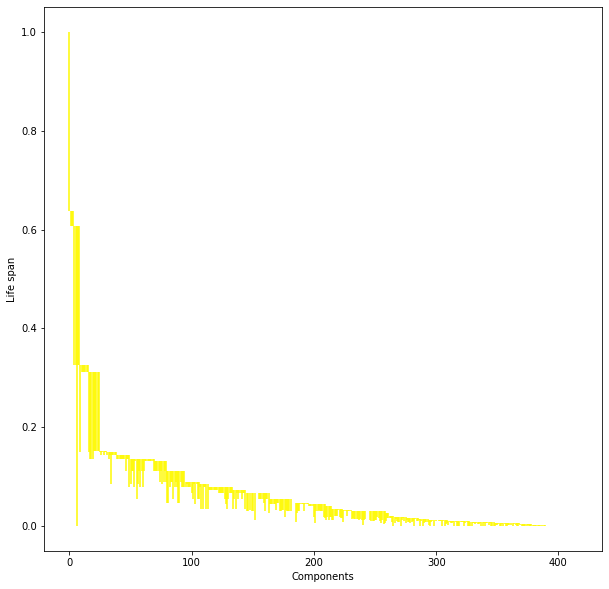

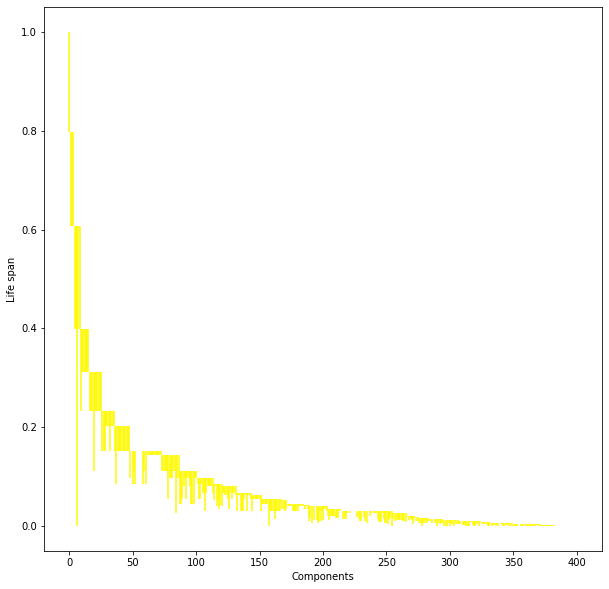

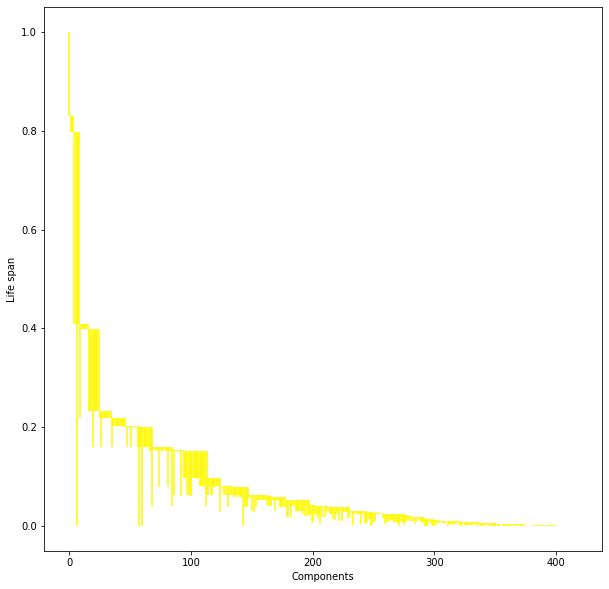

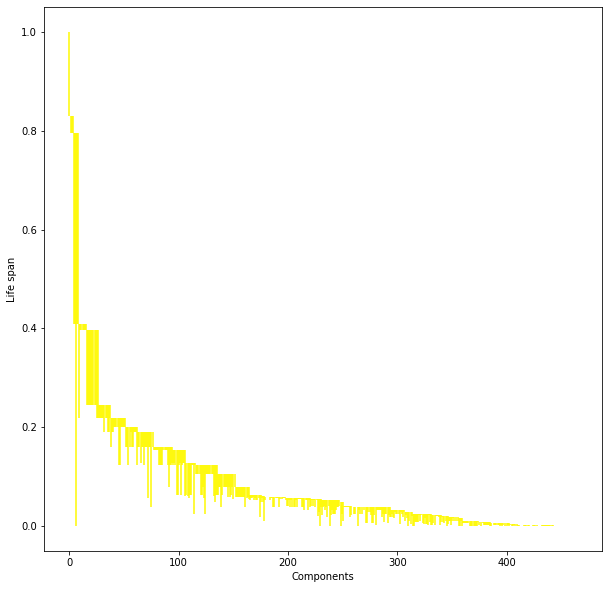

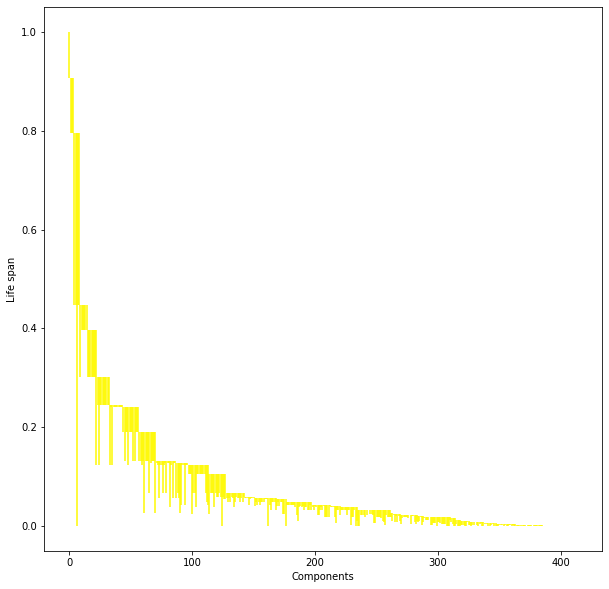

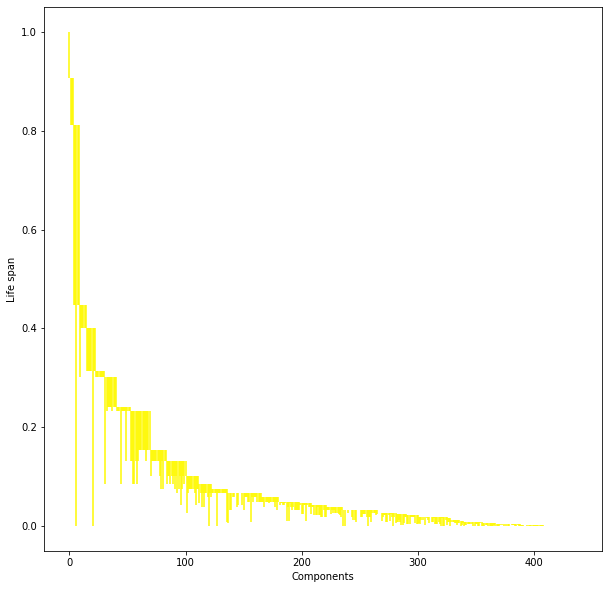

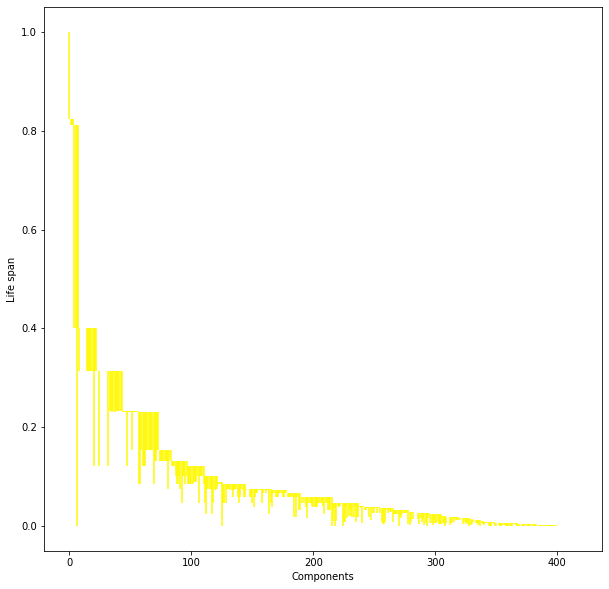

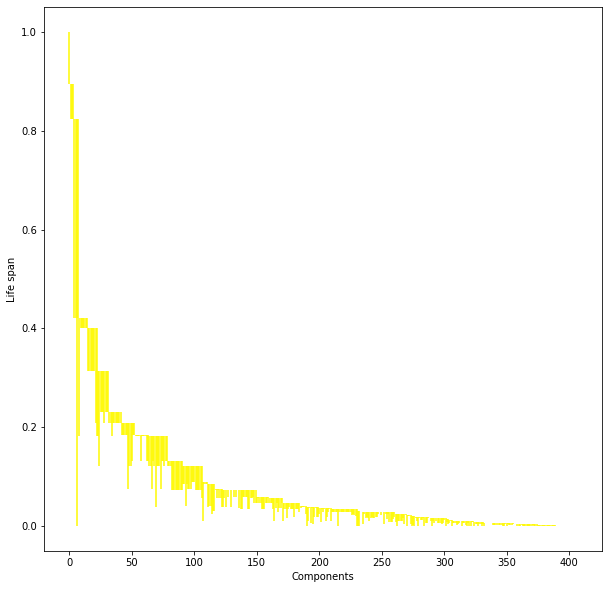

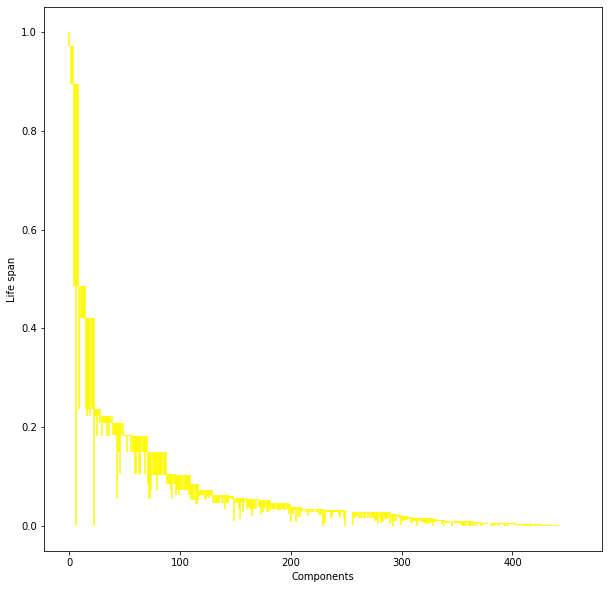

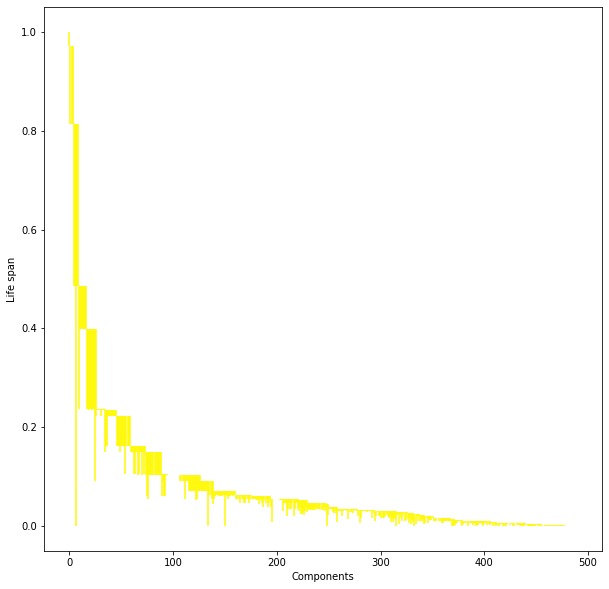

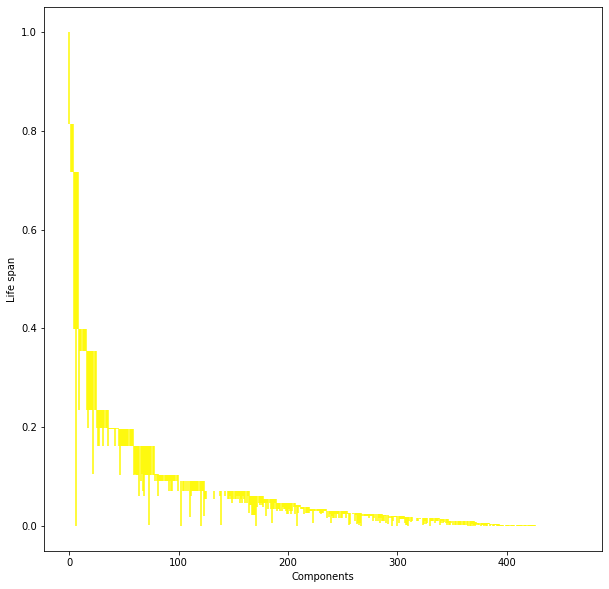

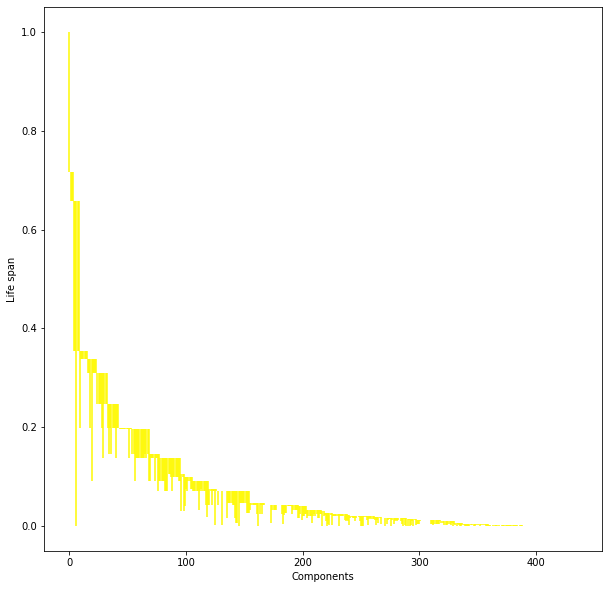

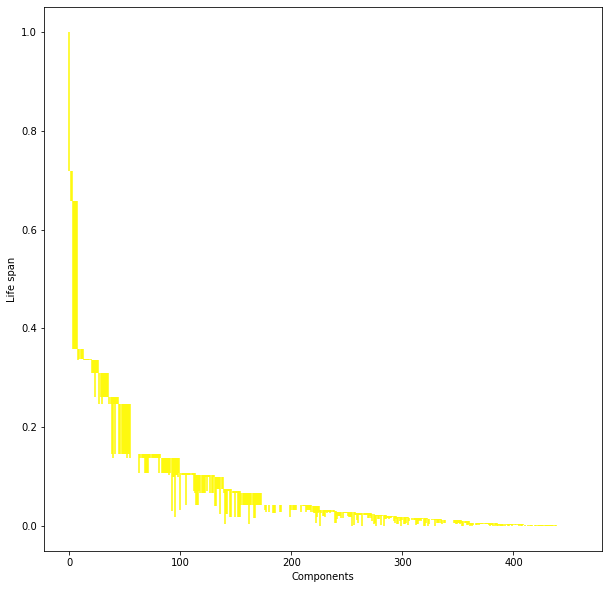

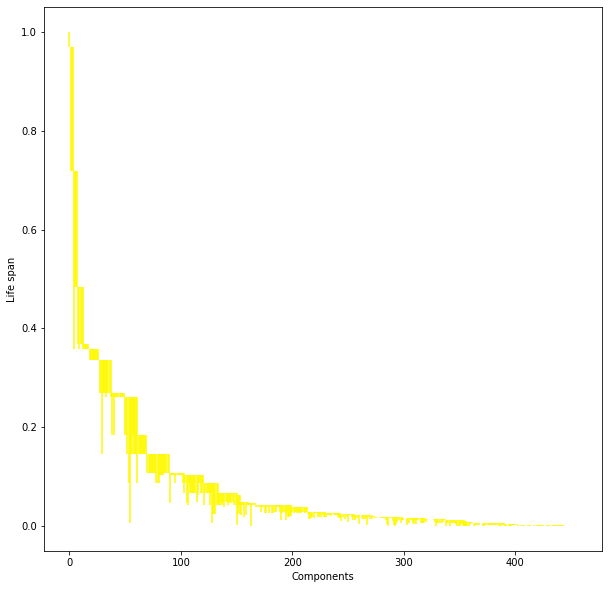

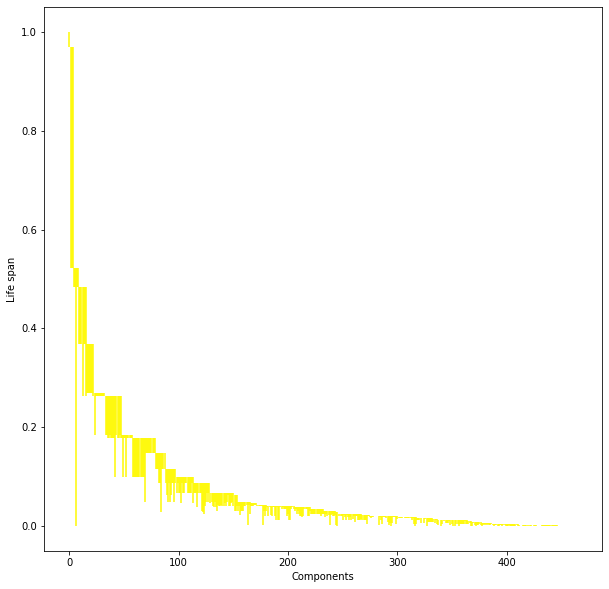

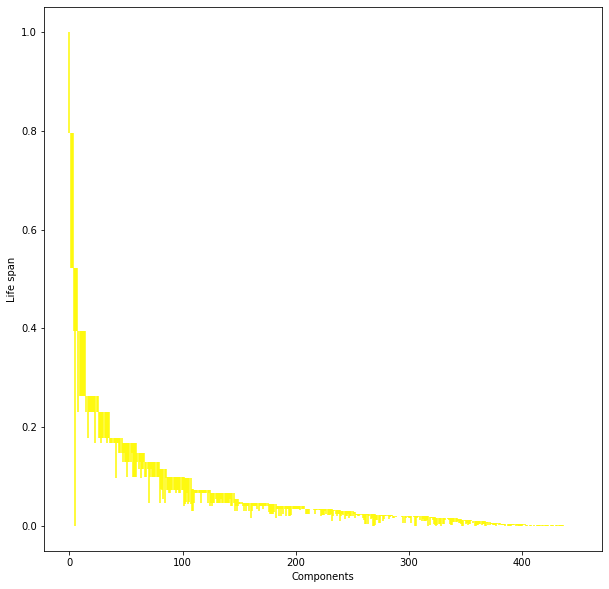

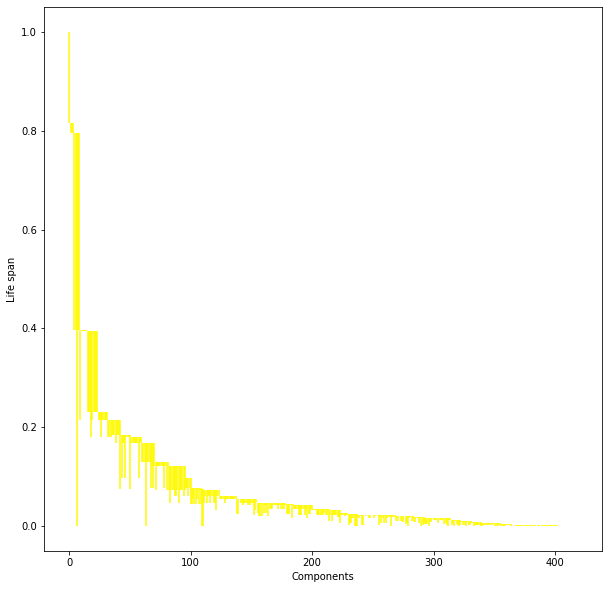

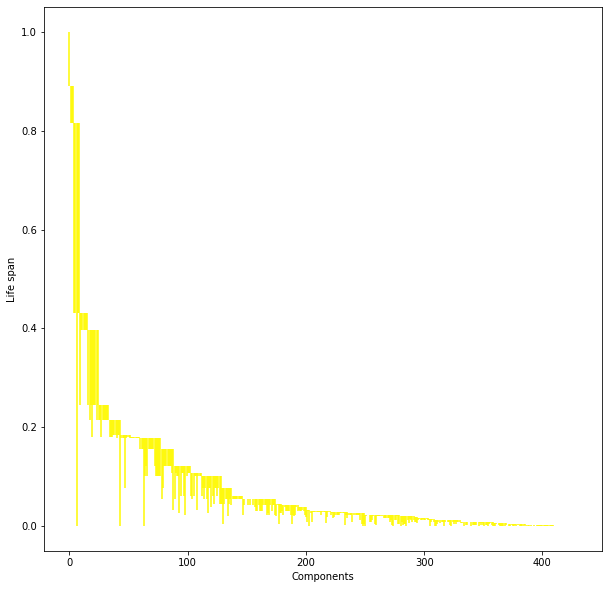

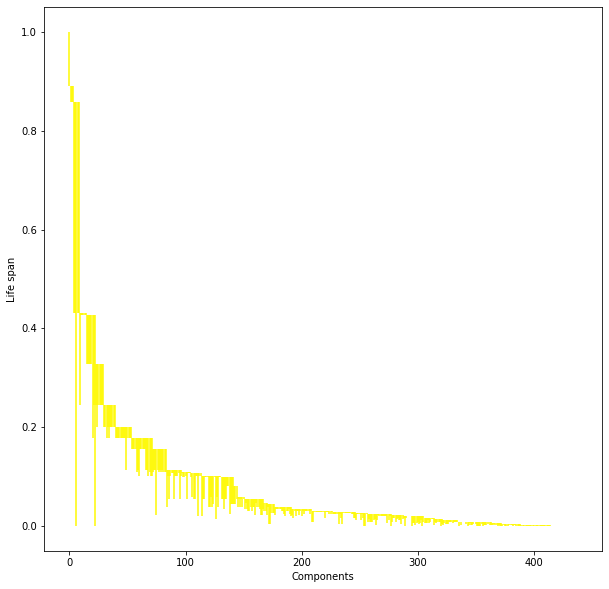

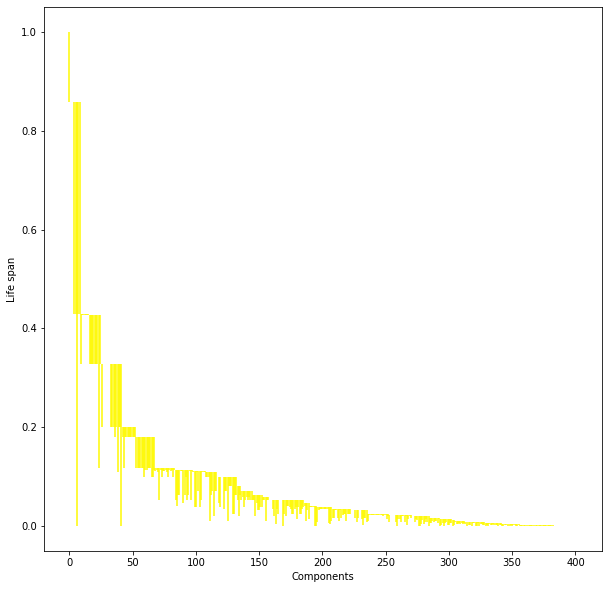

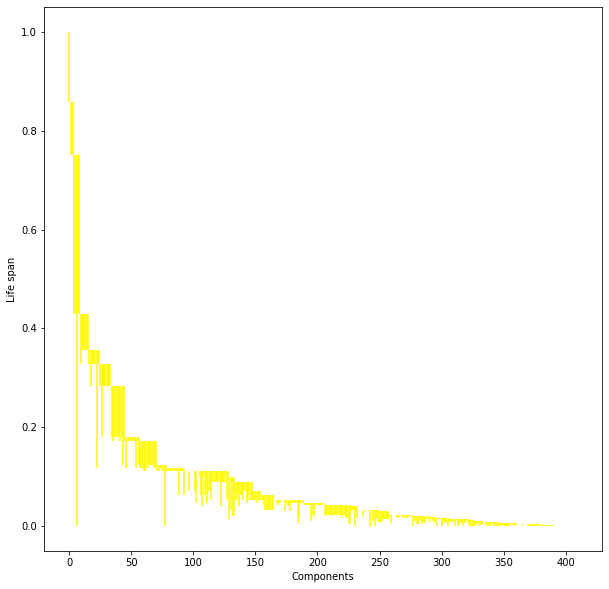

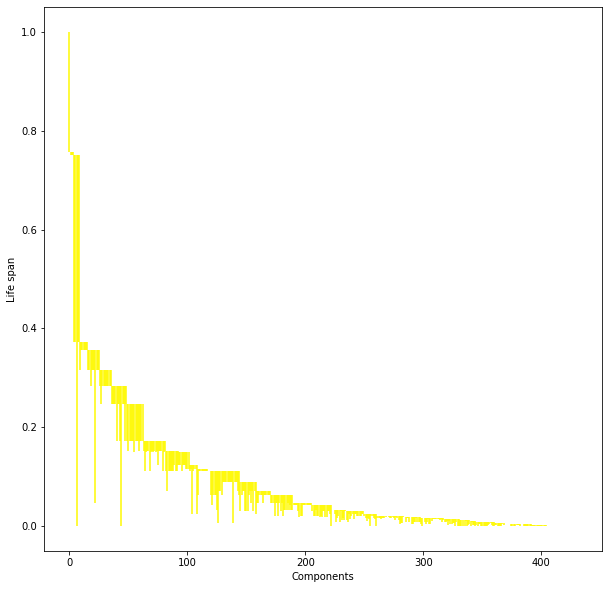

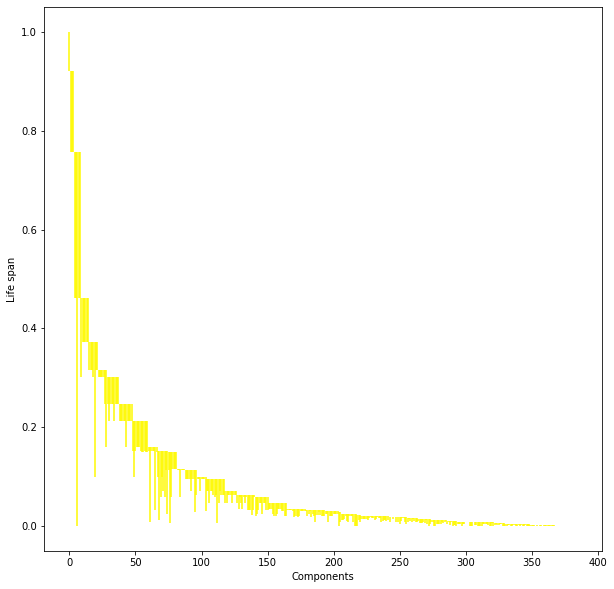

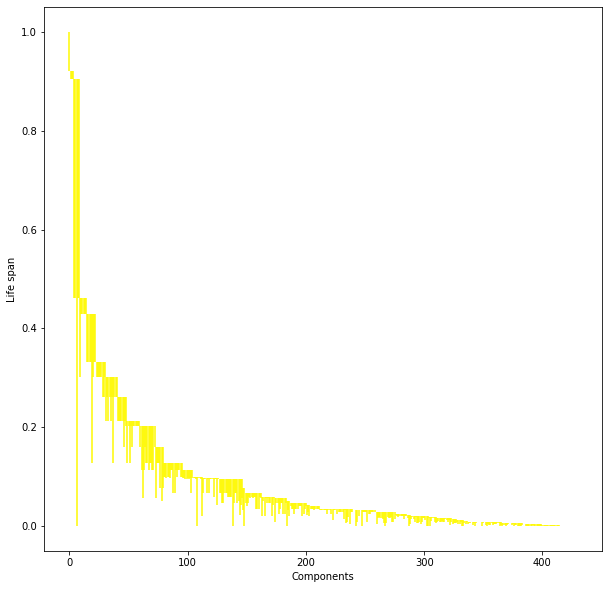

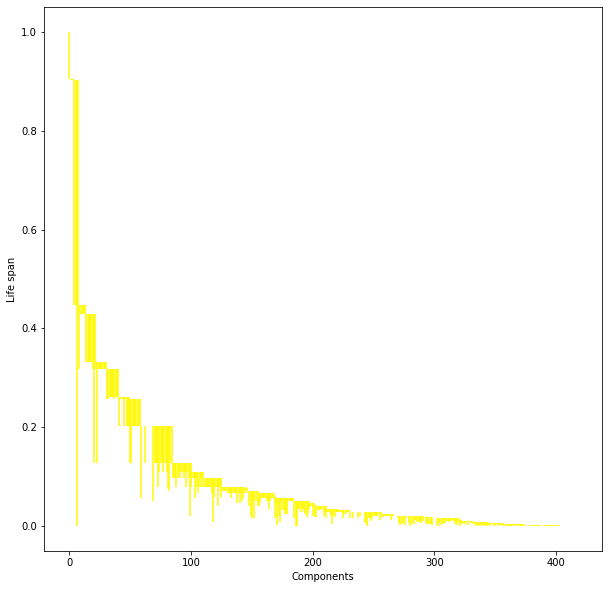

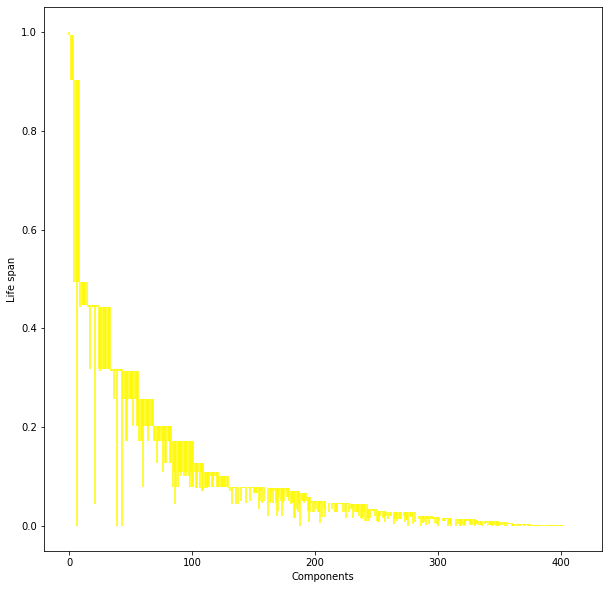

In [12]:
start = time()
barcodes = compute_barcodes(g.edges, g.distances)
end = time()
print("Graph constructed in %.2f" %(end-start))
plot_barcodes(barcodes)

In [13]:
start = time()
barcodes02 = compute_barcodes(g02.edges, g02.distances)
end = time()
print("Barcodes computed in %.2f" %(end-start))

Barcodes computed in 0.02


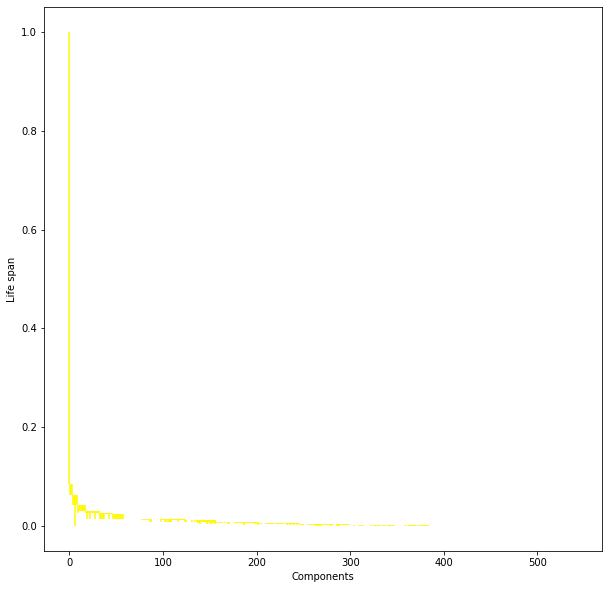

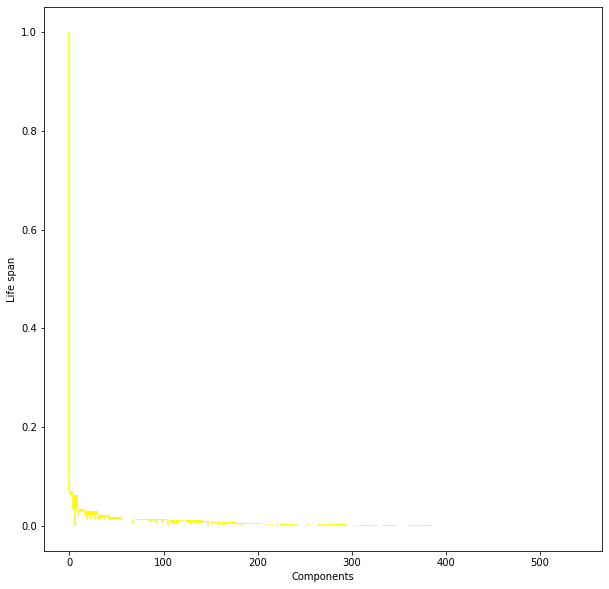

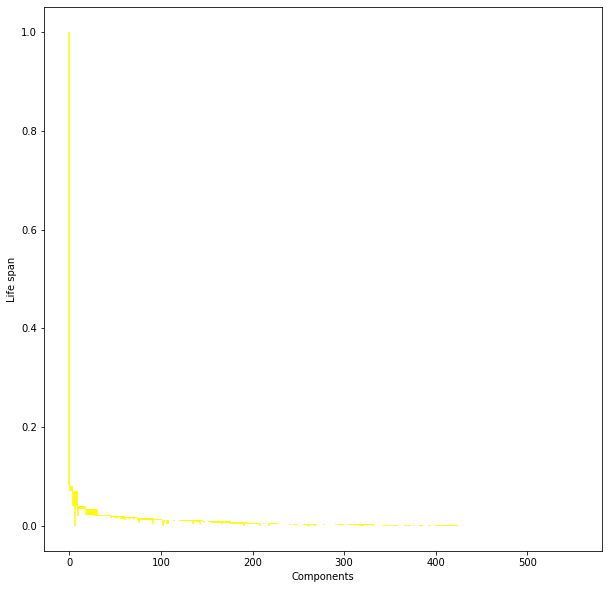

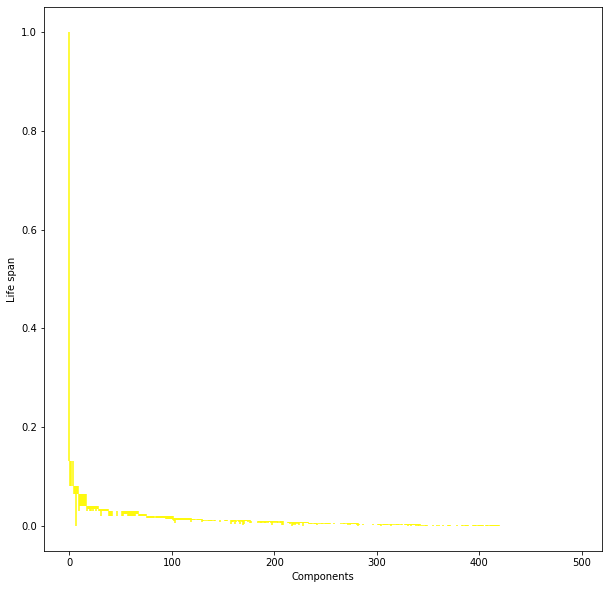

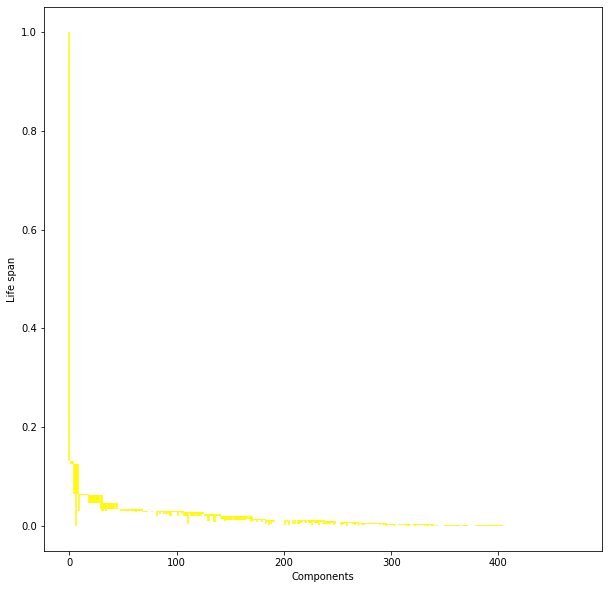

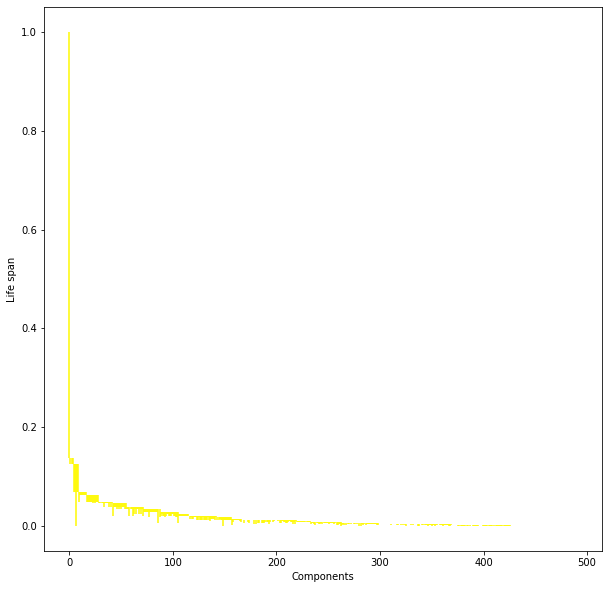

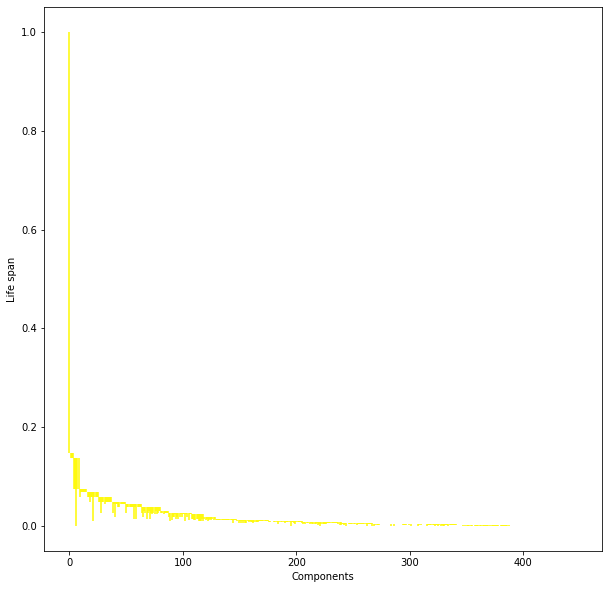

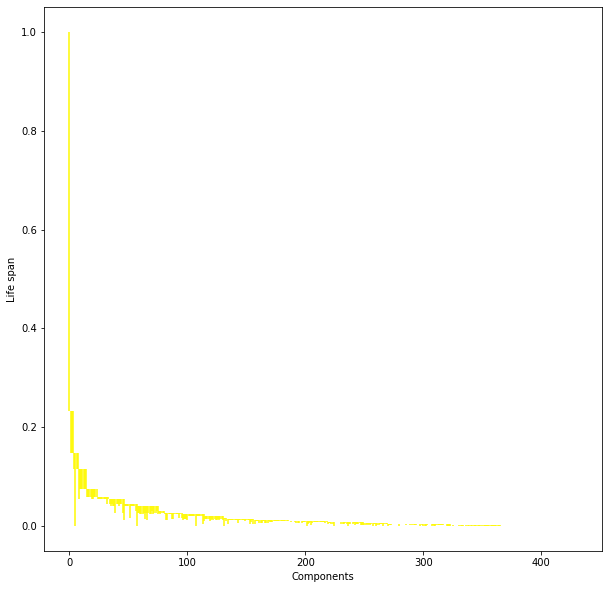

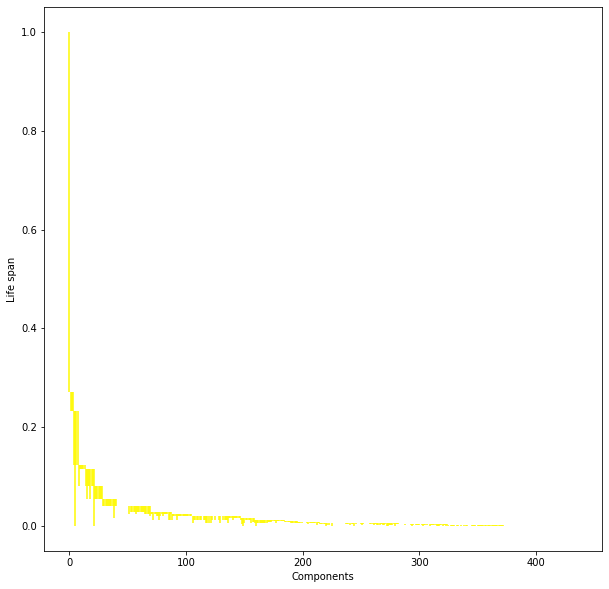

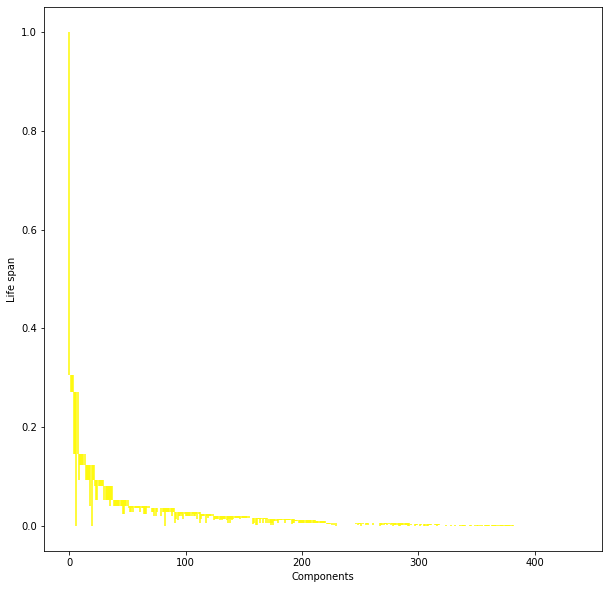

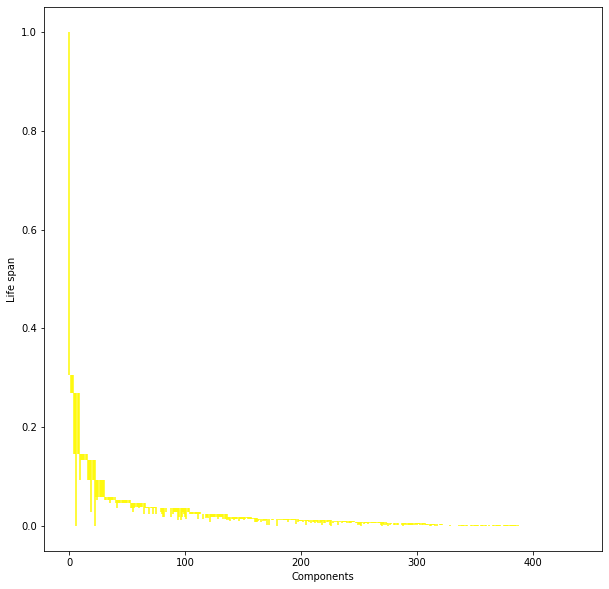

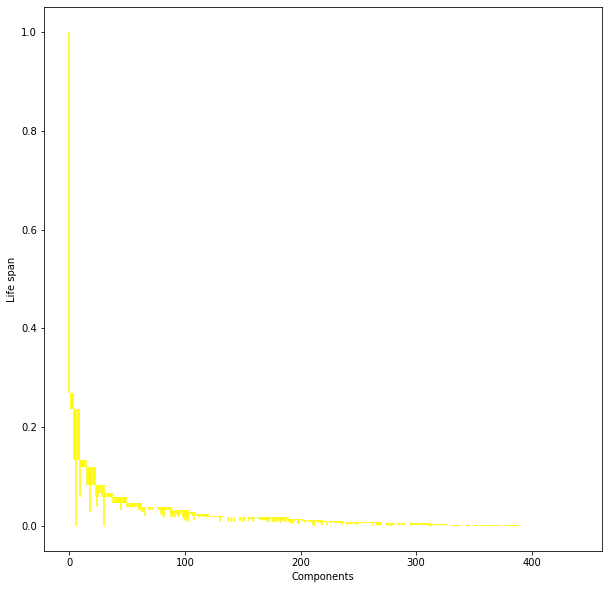

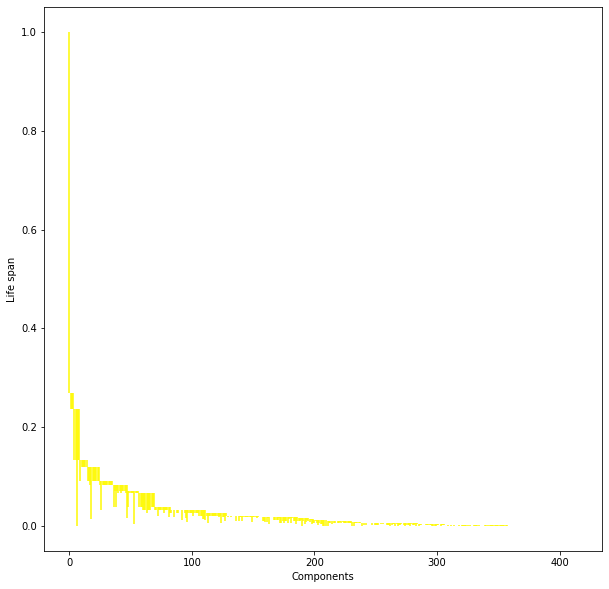

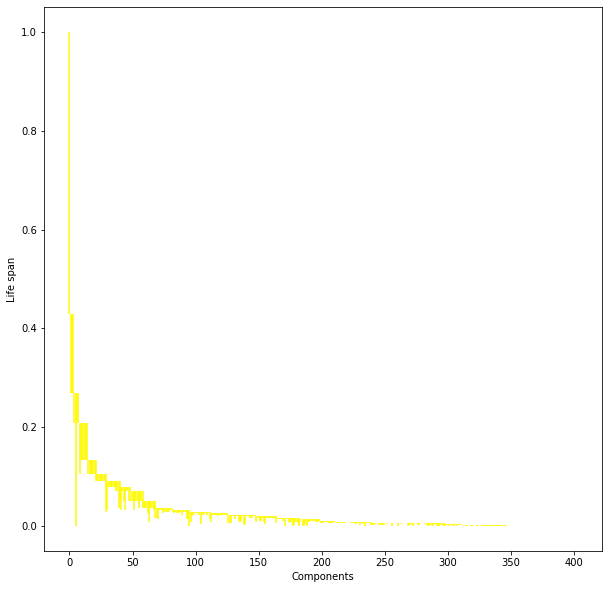

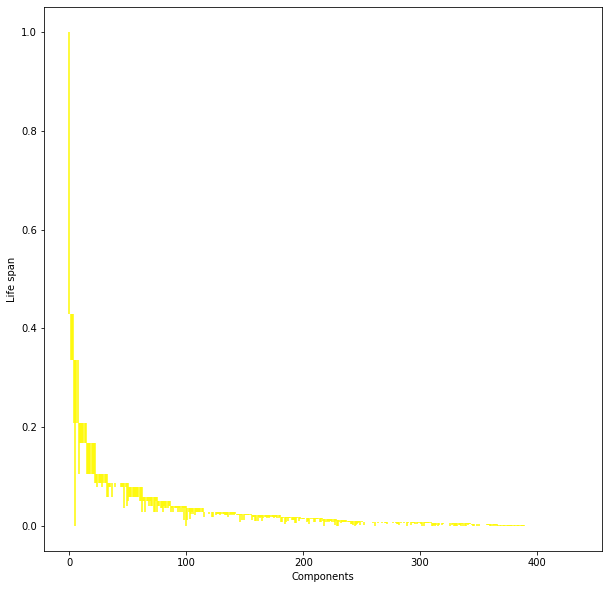

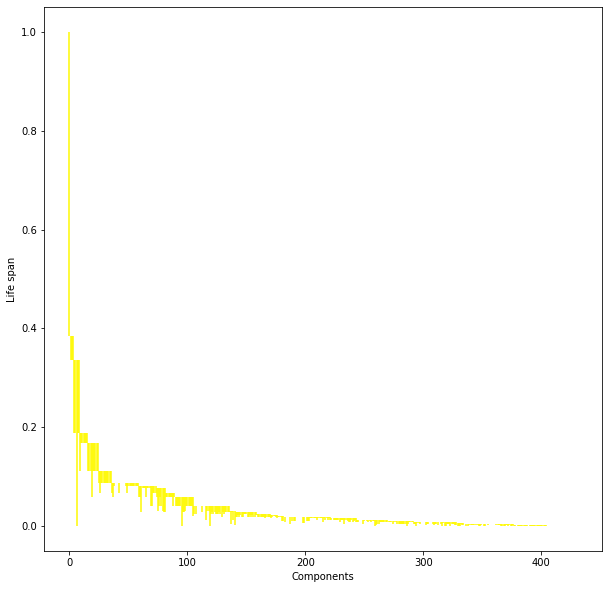

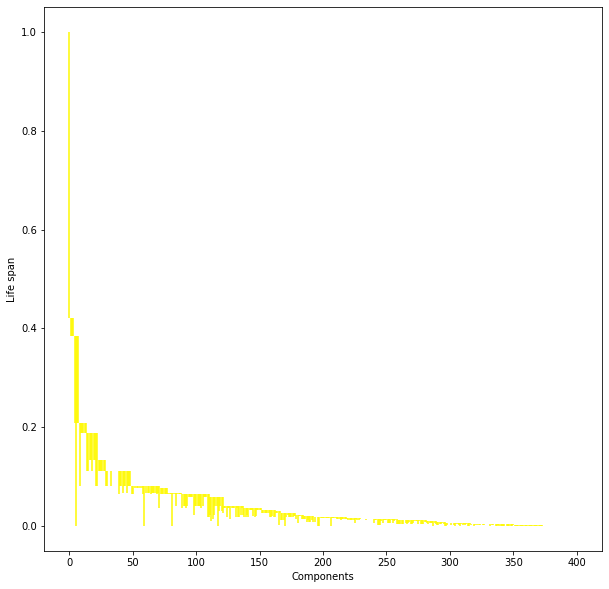

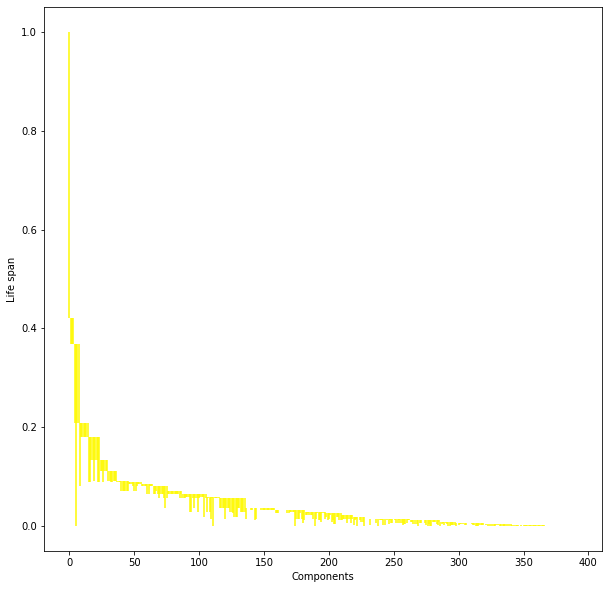

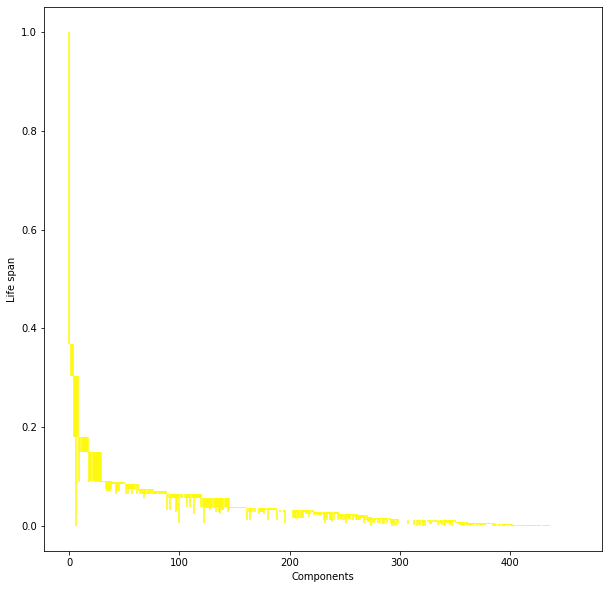

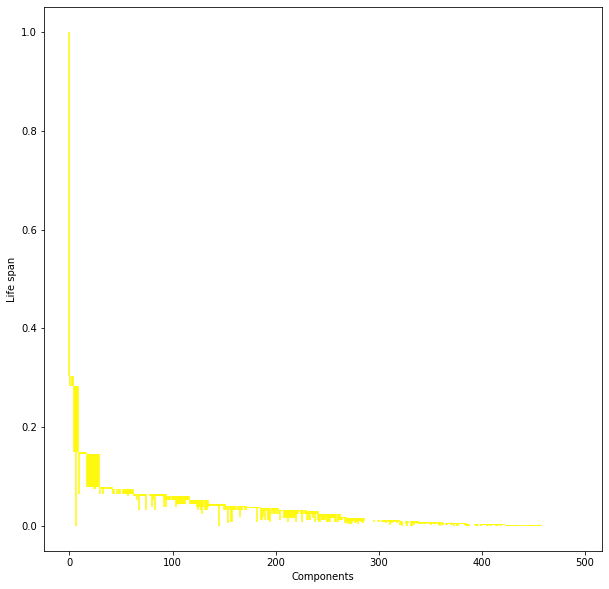

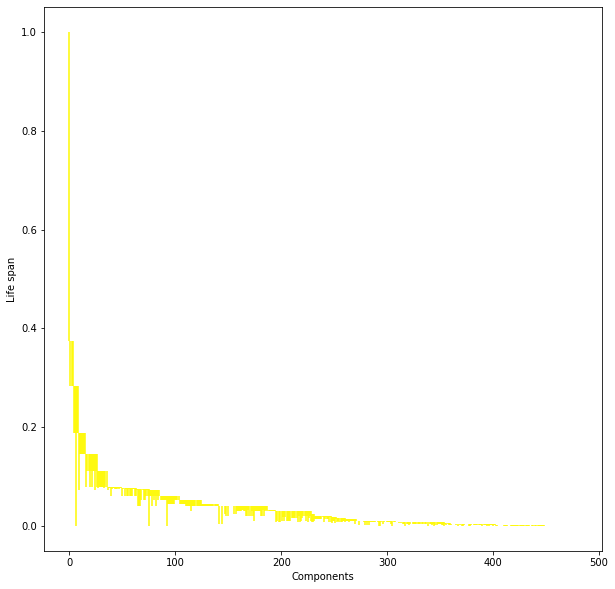

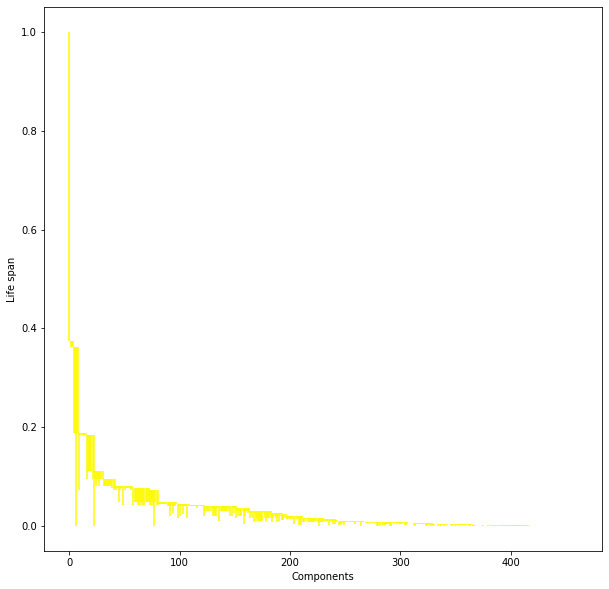

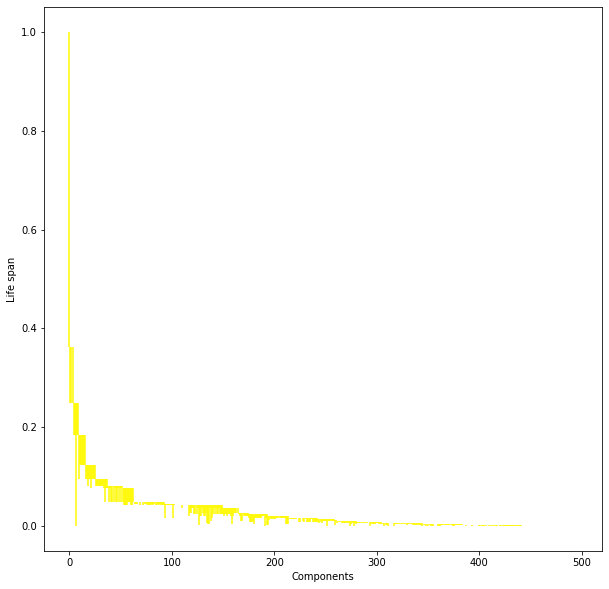

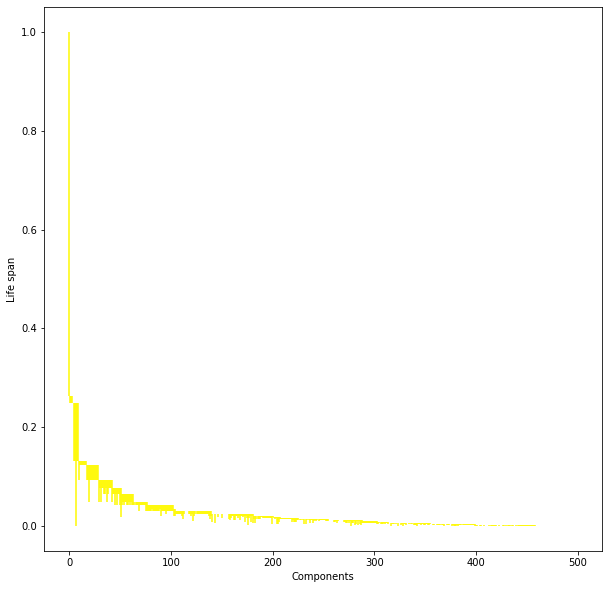

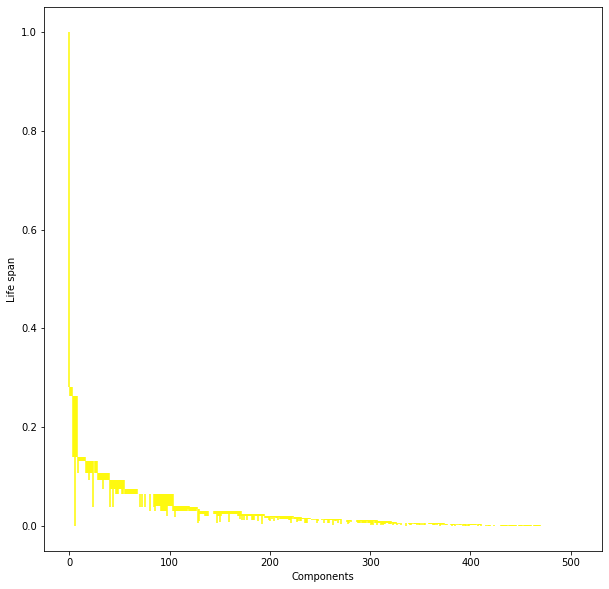

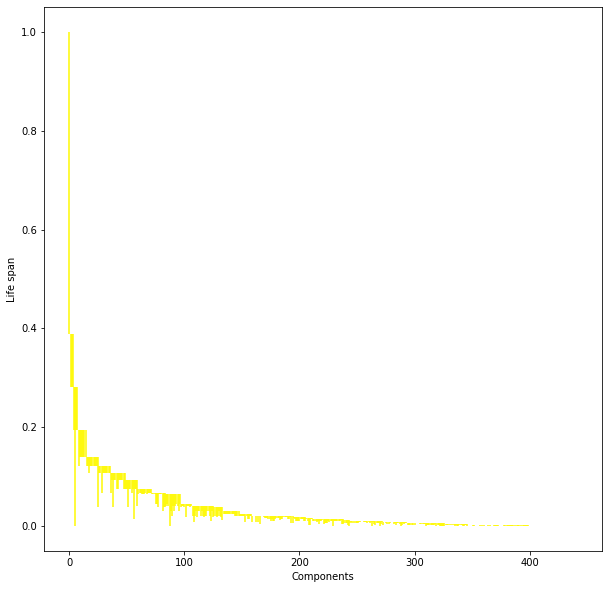

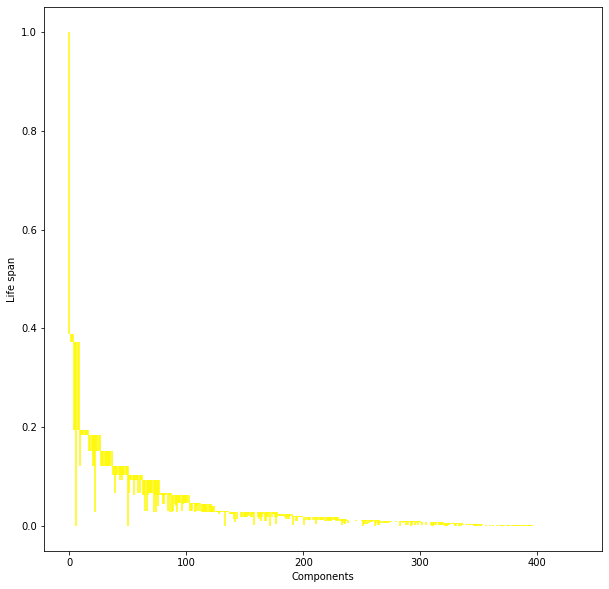

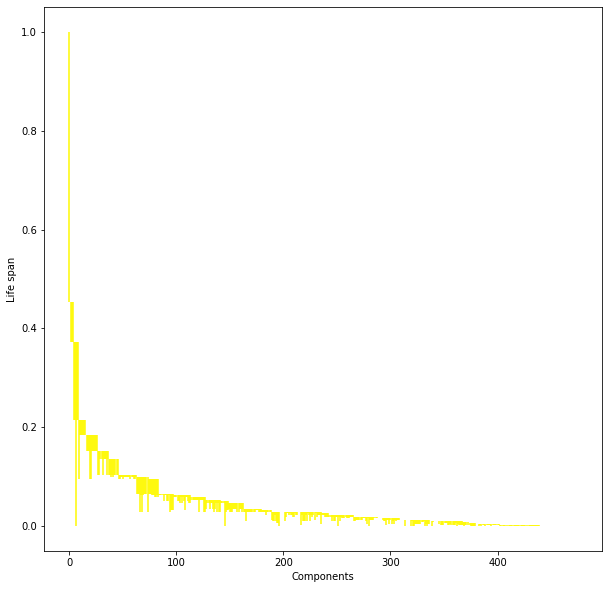

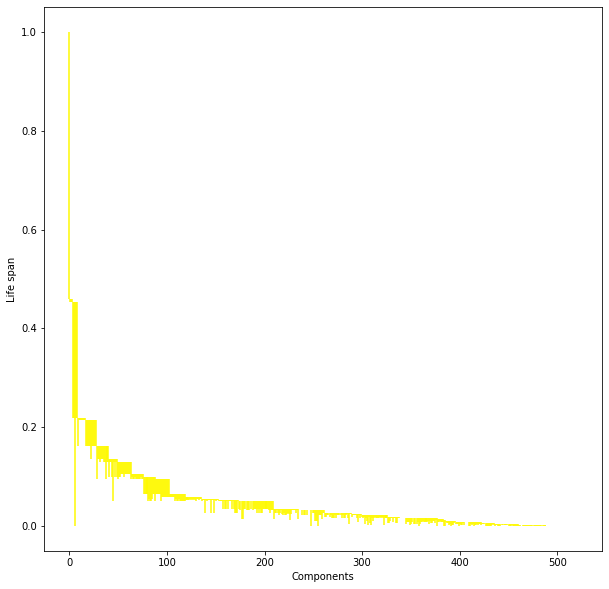

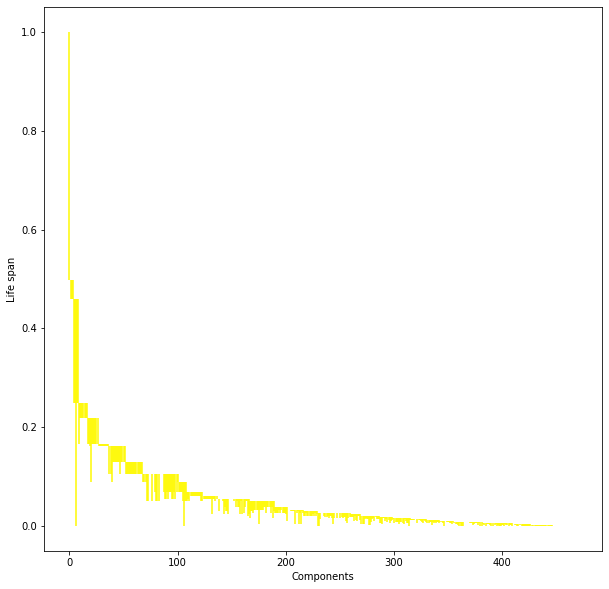

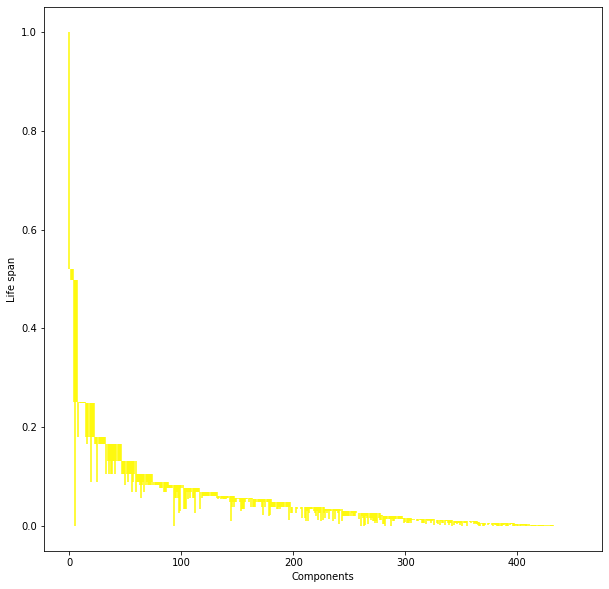

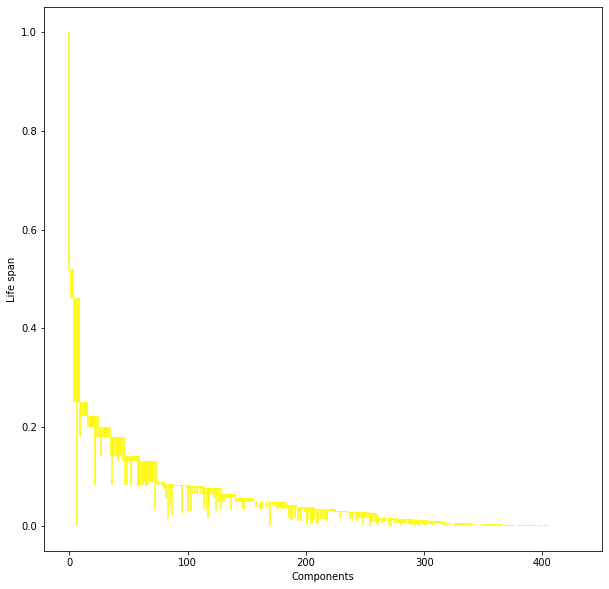

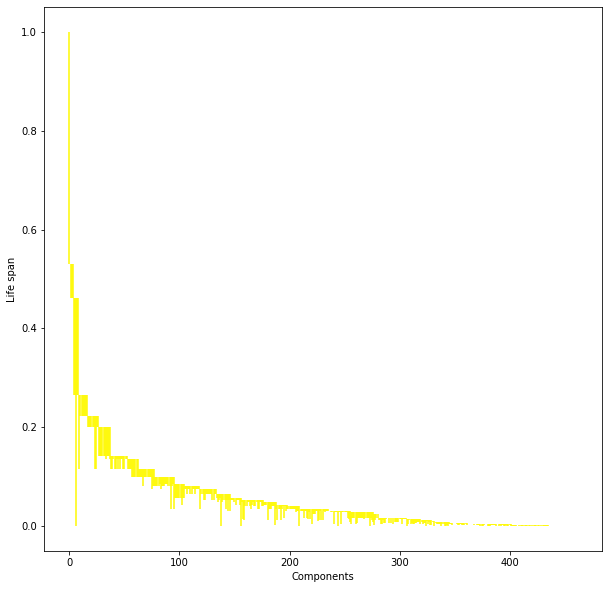

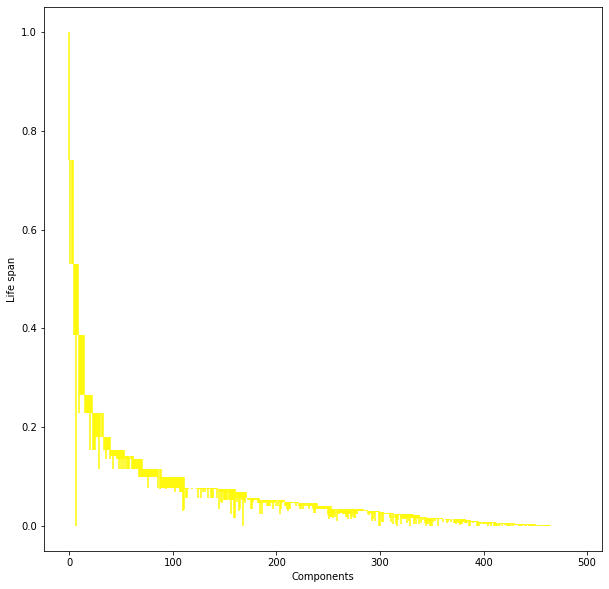

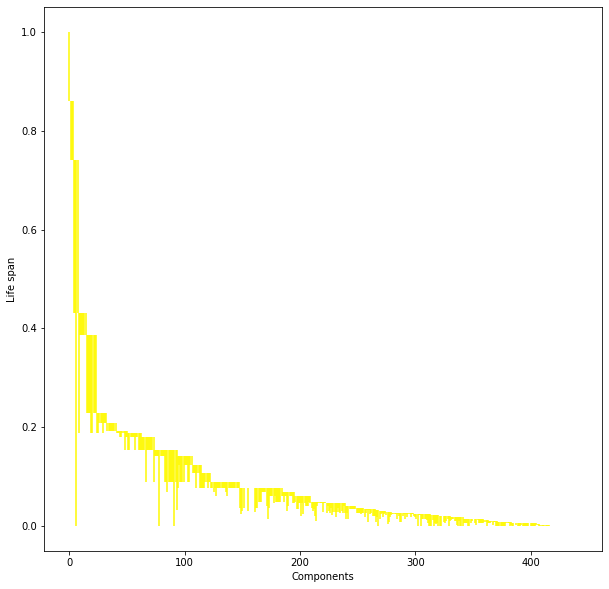

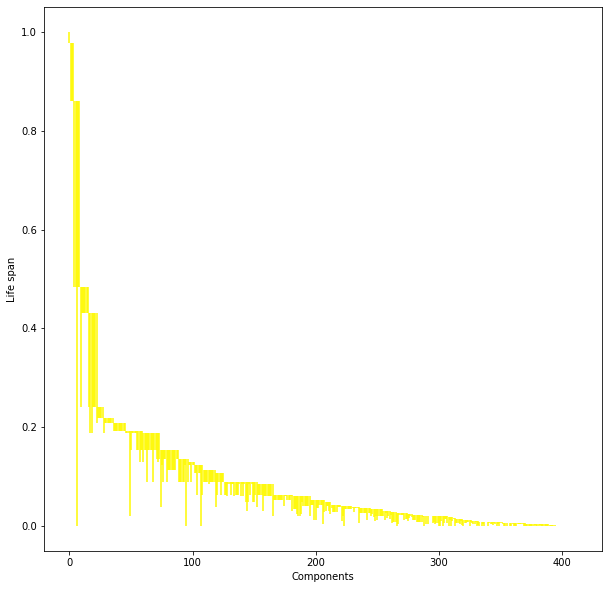

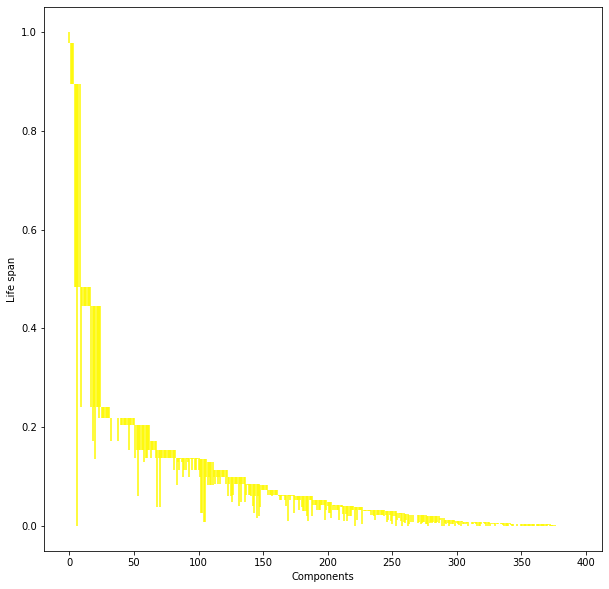

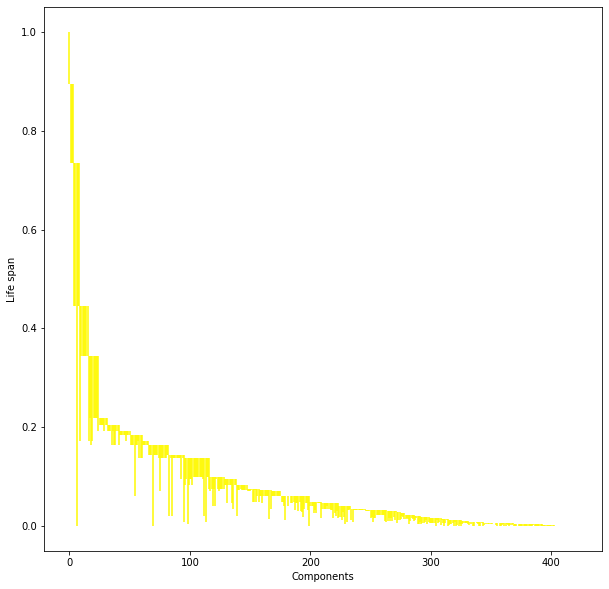

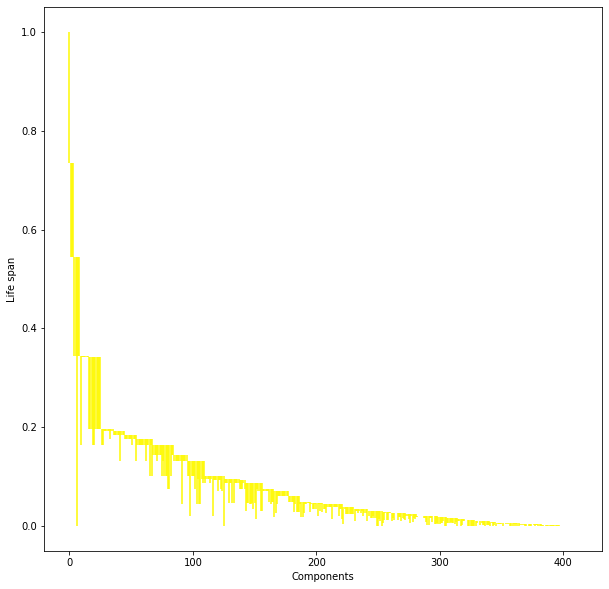

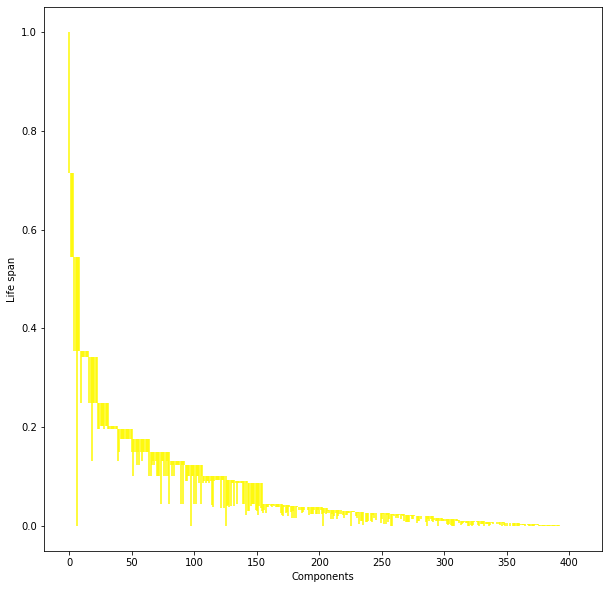

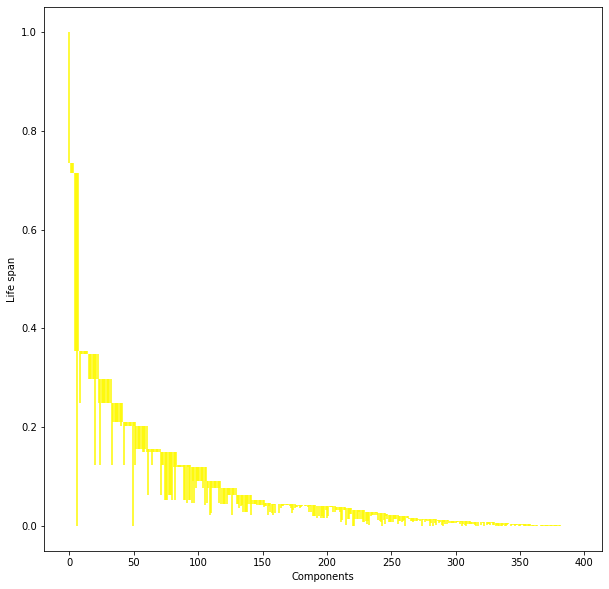

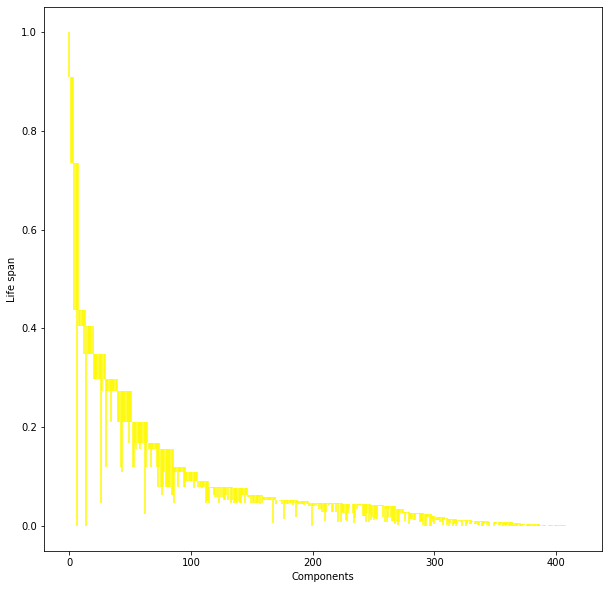

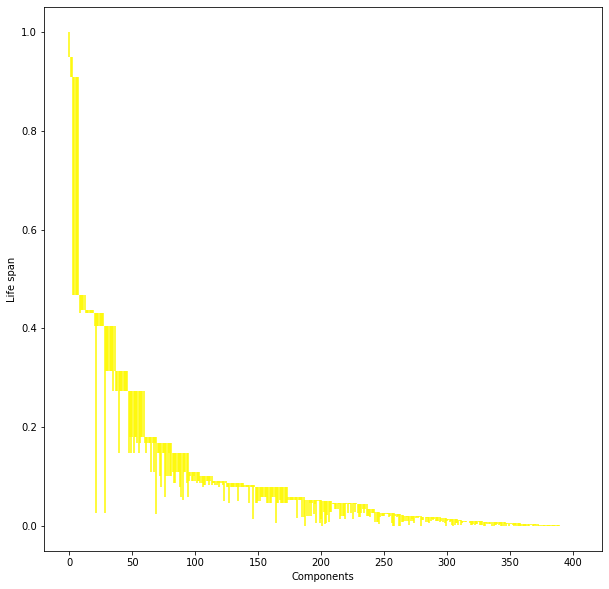

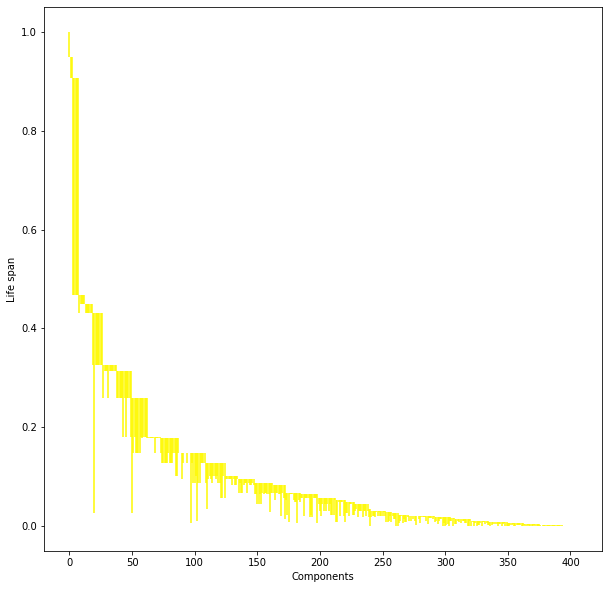

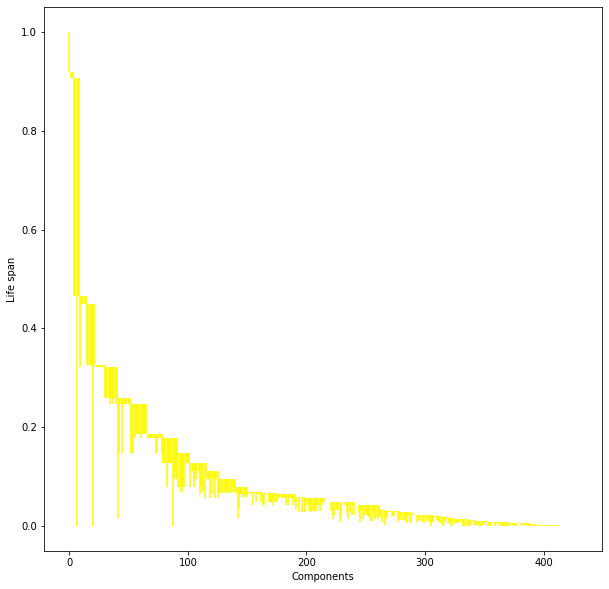

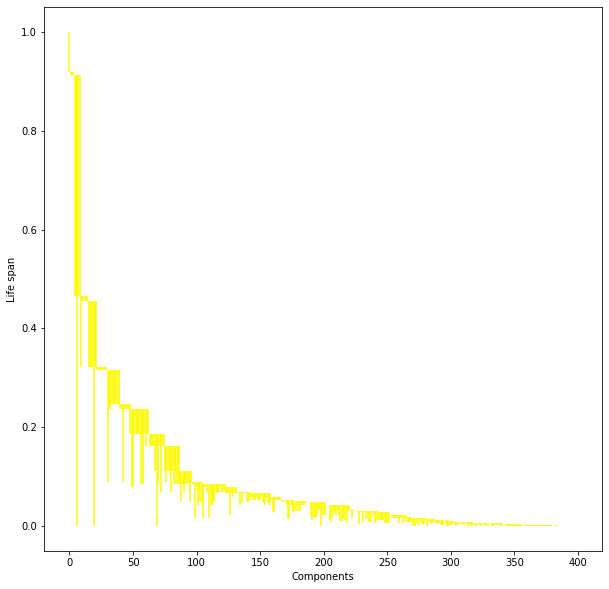

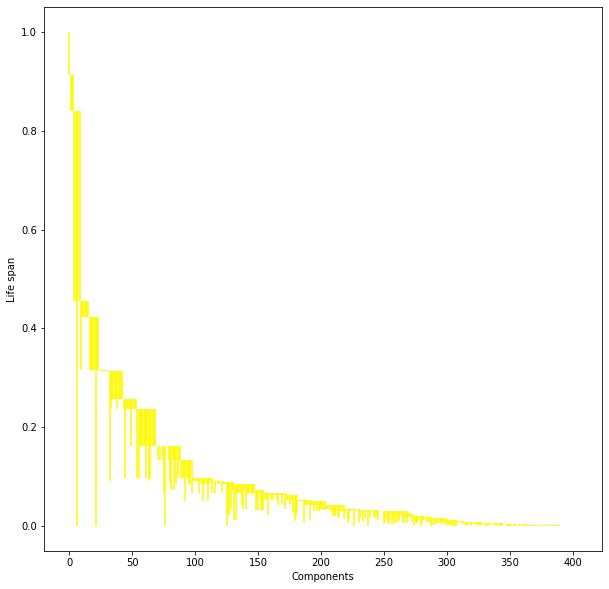

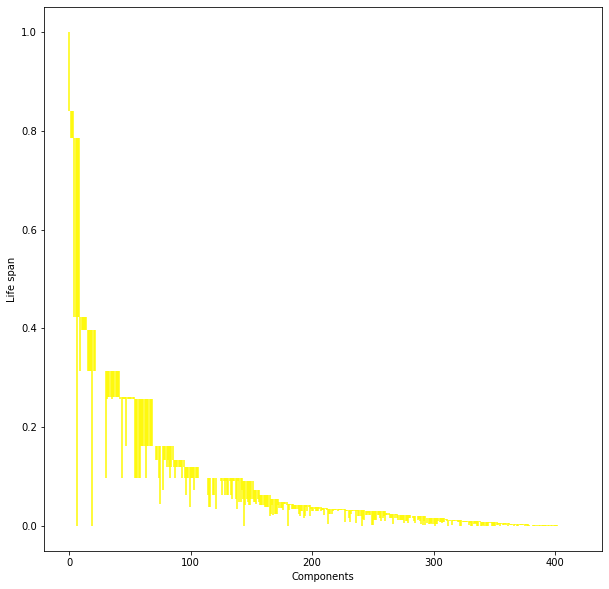

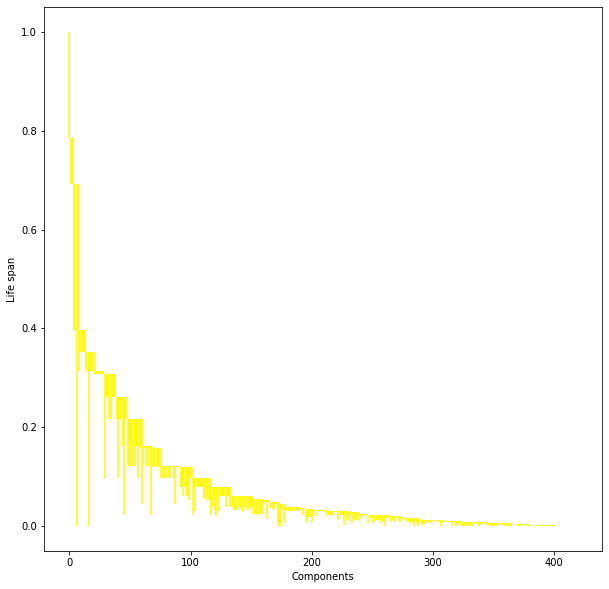

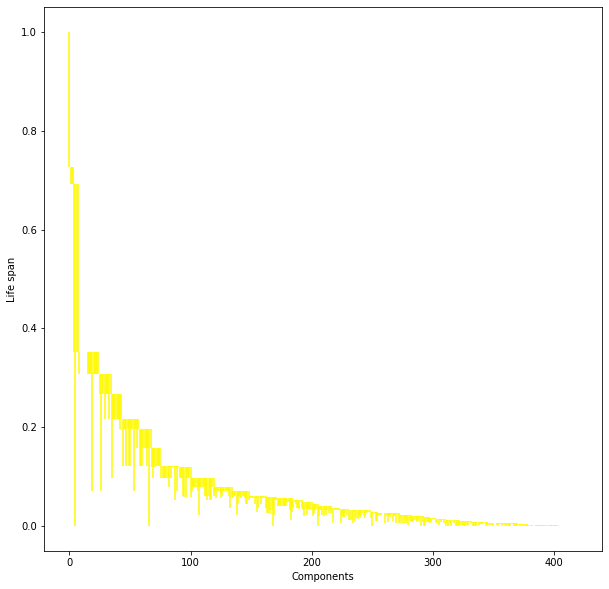

In [14]:
plot_barcodes(barcodes02)

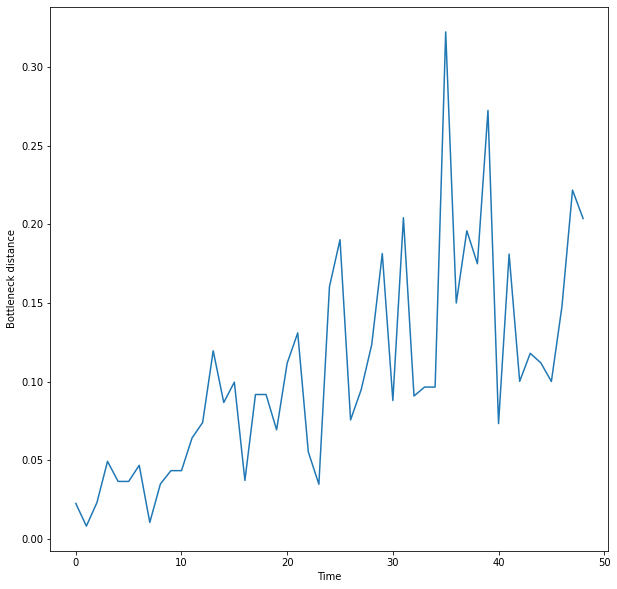

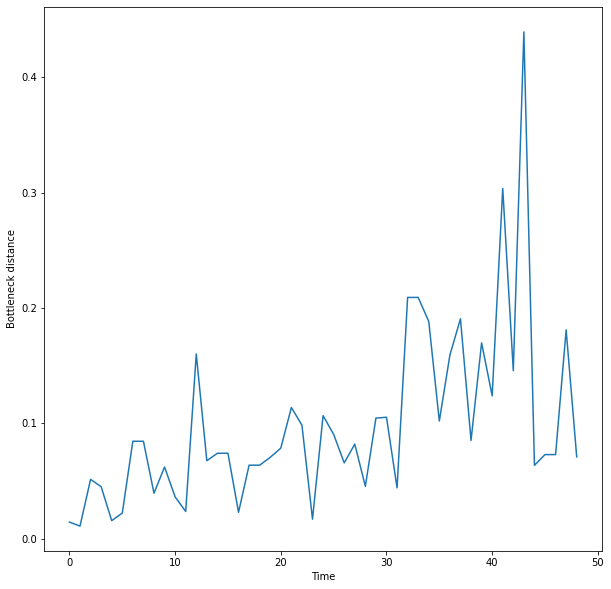

1.0

In [15]:
from gudhi import bottleneck_distance
bn_distances01 = compute_bottleneck_distances(barcodes)
bn_distances02 = compute_bottleneck_distances(barcodes02)
plot_bottleneck_distances(bn_distances01)
plot_bottleneck_distances(bn_distances02)
diags01 = [np.array([(bc_3[1],bc_3[0]) for bc_3 in bc_i]) for bc_i in barcodes]
diags02 = [np.array([(bc_3[1],bc_3[0]) for bc_3 in bc_i]) for bc_i in barcodes02]

bn = bottleneck_distance(diags01[0], diags02[40][:len(diags01[0])], e=0)

bottleneck_distance([[0., 1.]], [[0., 2.], [0, 1], [0, 0.5], [0. ,1]])
